author: Songyang Cheng

date: 1121

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
%matplotlib inline

## Pedestrian Count Distribution on Weekday/Weekends

In [2]:
pedestrian = pd.read_csv('Upper_State_St._Pedestrian_Counts.csv')

In [3]:
from time import time,localtime,strftime

In [4]:
names = pedestrian.Time.str.split(' ',expand=True)
names.columns = ['date', 'Hour']
pedestrian = pedestrian.join(names)
pedestrian["date"] = pd.to_datetime(pedestrian["date"])
pedestrian["day_of_week"] = pedestrian["date"].dt.weekday_name
pedestrian["day_of_week"].value_counts()

Friday       1272
Monday       1272
Sunday       1248
Tuesday      1248
Wednesday    1248
Thursday     1247
Saturday     1224
Name: day_of_week, dtype: int64

In [5]:
ped_wkd = pedestrian[(pedestrian['day_of_week'] == 'Monday')|
                     (pedestrian['day_of_week'] == 'Tuesday')|
                     (pedestrian['day_of_week'] == 'Wednesday')|
                     (pedestrian['day_of_week'] == 'Thursday') ]
ped_fri = pedestrian[(pedestrian['day_of_week'] == 'Friday')]
ped_sat = pedestrian[(pedestrian['day_of_week'] == 'Saturday')]
ped_sun = pedestrian[(pedestrian['day_of_week'] == 'Sunday')]

In [6]:
def column_concat_df(wkd, fri, sat, sun, col_name):
    df = pd.concat([wkd[col_name].reset_index(drop=True), 
                    fri[col_name].reset_index(drop=True),
                    sat[col_name].reset_index(drop=True),
                    sun[col_name].reset_index(drop=True)], 
                     axis=1)
    df.columns = ["Weekday", "Friday", "Saturday", "Sunday"]
    return df

## Relationship Across Time betwee Traffic Light Cycle and Pedestrain Volume 

In [7]:
programs = pd.read_excel('te_cycle_data.xlsx', sheet_name='Programs')
patterns = pd.read_excel('te_cycle_data.xlsx', sheet_name='Patterns')

In [8]:
programs['Pattern'] = programs['Pattern'].replace('Flash', 0)
programs['Pattern'].astype('int64')
programs['Pattern'].head()

0    0
1    6
2    3
3    1
4    5
Name: Pattern, dtype: int64

In [9]:
combined = pd.merge(programs, patterns, on=['Intersection', 'Pattern'], how="left")
Dayton = combined[combined['Intersection'] == 'State and Dayton']
Gorham = combined[combined['Intersection'] == 'State and Gorham']
Johnson = combined[combined['Intersection'] == 'State and Johnson']

In [10]:
Dayton_weekday = Dayton[Dayton['Day Type'] == 'Monday - Thursday']
Dayton_fri = Dayton[Dayton['Day Type'] == 'Friday']
Dayton_sat = Dayton[Dayton['Day Type'] == 'Saturday']
Dayton_sun = Dayton[Dayton['Day Type'] == 'Sunday']

Johnson_wkd = Johnson[Johnson['Day Type'] == 'Monday - Thursday']
Johnson_fri = Johnson[Johnson['Day Type'] == 'Friday']
Johnson_sat = Johnson[Johnson['Day Type'] == 'Saturday']
Johnson_sun = Johnson[Johnson['Day Type'] == 'Sunday']

Gorham_wkd = Gorham[Gorham['Day Type'] == 'Monday - Thursday']
Gorham_fri = Gorham[Gorham['Day Type'] == 'Friday']
Gorham_sat = Gorham[Gorham['Day Type'] == 'Saturday']
Gorham_sun = Gorham[Gorham['Day Type'] == 'Sunday']

In [11]:
import warnings
warnings.filterwarnings("ignore")

## Green Lights Cycle

In [12]:
pattern_list = ['Pattern', 'Total Cycle Time (s)',
                'Main Street Red (s)', 'Main Street Yellow (s)', 'Main Street Green (s)', 'Main Street Total Cycle Time (s)',
                'Cross Street Red (s)', 'Cross Street Yellow (s)', 'Cross Street Green (s)', 'Cross Street Total Cycle Time (s)']

In [13]:
def constructArr(pat_name, df1, df2=None, df3=None, df4=None):
    length = len(pat_name)/2
    assert length <= 4
    if length == 2:
        assert (df2 is not None)&(df3 is None)&(df4 is None)
    elif length == 3:
        assert (df2 is not None)&(df3 is None)&(df4 is None)
    else:
        assert (df2 is not None)&(df3 is not None)&(df4 is not None)  
    
    if length == 2:
        data = np.array([[float(df1["Main Street Red (s)"]), float(df1['Cross Street Red (s)']), 
                  float(df2["Main Street Red (s)"]), float(df2['Cross Street Red (s)'])], 
                 [float(df1["Main Street Yellow (s)"]), float(df1['Cross Street Yellow (s)']), 
                  float(df2["Main Street Yellow (s)"]), float(df2['Cross Street Yellow (s)'])],
                [float(df1["Main Street Green (s)"]), float(df1['Cross Street Green (s)']), 
                 float(df2["Main Street Green (s)"]), float(df2['Cross Street Green (s)'])]])
        
        percentages = np.array([
                        [float(df1["Main Street Red (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Main Street Yellow (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Main Street Green (s)"]/df1['Total Cycle Time (s)'])*100], 
                        [float(df1["Cross Street Red (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Cross Street Yellow (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Cross Street Green (s)"]/df1['Total Cycle Time (s)'])*100],
                       [float(df2["Main Street Red (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Main Street Yellow (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Main Street Green (s)"]/df2['Total Cycle Time (s)'])*100], 
                        [float(df2["Cross Street Red (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Cross Street Yellow (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Cross Street Green (s)"]/df2['Total Cycle Time (s)'])*100]
                       ])
        y_pos = [0, 0.08, 0.25, 0.33]
    elif length == 4:
        data = np.array([[float(df1["Main Street Red (s)"]), float(df1['Cross Street Red (s)']), 
                  float(df2["Main Street Red (s)"]), float(df2['Cross Street Red (s)']), 
                    float(df3["Main Street Red (s)"]), float(df3['Cross Street Red (s)']), 
                  float(df4["Main Street Red (s)"]), float(df4['Cross Street Red (s)'])], 
                 [float(df1["Main Street Yellow (s)"]), float(df1['Cross Street Yellow (s)']), 
                  float(df2["Main Street Yellow (s)"]), float(df2['Cross Street Yellow (s)']),
                 float(df3["Main Street Yellow (s)"]), float(df3['Cross Street Yellow (s)']), 
                  float(df4["Main Street Yellow (s)"]), float(df4['Cross Street Yellow (s)'])],
                [float(df1["Main Street Green (s)"]), float(df1['Cross Street Green (s)']), 
                 float(df2["Main Street Green (s)"]), float(df2['Cross Street Green (s)']),
                float(df3["Main Street Green (s)"]), float(df3['Cross Street Green (s)']), 
                 float(df4["Main Street Green (s)"]), float(df4['Cross Street Green (s)'])]])
        
        percentages = np.array([
                        [float(df1["Main Street Red (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Main Street Yellow (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Main Street Green (s)"]/df1['Total Cycle Time (s)'])*100], 
                        [float(df1["Cross Street Red (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Cross Street Yellow (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Cross Street Green (s)"]/df1['Total Cycle Time (s)'])*100],
                       [float(df2["Main Street Red (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Main Street Yellow (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Main Street Green (s)"]/df2['Total Cycle Time (s)'])*100], 
                        [float(df2["Cross Street Red (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Cross Street Yellow (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Cross Street Green (s)"]/df2['Total Cycle Time (s)'])*100], 
                        [float(df3["Main Street Red (s)"]/df3['Total Cycle Time (s)'])*100, 
                         float(df3["Main Street Yellow (s)"]/df3['Total Cycle Time (s)'])*100, 
                         float(df3["Main Street Green (s)"]/df3['Total Cycle Time (s)'])*100], 
                        [float(df3["Cross Street Red (s)"]/df3['Total Cycle Time (s)'])*100, 
                         float(df3["Cross Street Yellow (s)"]/df3['Total Cycle Time (s)'])*100, 
                         float(df3["Cross Street Green (s)"]/df3['Total Cycle Time (s)'])*100],
                       [float(df4["Main Street Red (s)"]/df4['Total Cycle Time (s)'])*100, 
                         float(df4["Main Street Yellow (s)"]/df4['Total Cycle Time (s)'])*100, 
                         float(df4["Main Street Green (s)"]/df4['Total Cycle Time (s)'])*100], 
                        [float(df4["Cross Street Red (s)"]/df4['Total Cycle Time (s)'])*100, 
                         float(df4["Cross Street Yellow (s)"]/df4['Total Cycle Time (s)'])*100, 
                         float(df4["Cross Street Green (s)"]/df4['Total Cycle Time (s)'])*100]
                       ])
        y_pos = [0, 0.08, 0.25, 0.33, 0.5, 0.58, 0.75, 0.83]
        
    return data, percentages, y_pos

In [14]:
def visPattern(pat_name, data, percentages, xlab, title, y_pos, figsize):
    segments = 3
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)

    colors1 =['red', 'yellow', 'green']
    patch_handles = []
    left = np.zeros(len(pat_name)) # left alignment of data starts at zero

    for i, d in enumerate(data):
        patch_handles.append(ax.barh(y=y_pos, width=d, height=0.05, left=left, color=colors1[i], align='center'))
        # accumulate the left-hand offsets
        left += d

    # go through all of the bar segments and annotate
    for j in range(len(patch_handles)):
        for i, patch in enumerate(patch_handles[j].get_children()):
            bl = patch.get_xy()
            x = 0.5*patch.get_width() + bl[0]
            y = 0.5*patch.get_height() + bl[1]
            ax.text(x,y, "%.1f%%" % (percentages[i,j]), ha='center')

    ax.set_yticks(y_pos)
    ax.set_yticklabels(pat_name)
    ax.set_xlabel(xlab)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [15]:
Dayton_cycle = patterns[patterns['Intersection'] == 'State and Dayton']
Dayton_cycle = Dayton_cycle[pattern_list]
Dayton_cycle['Main Street Red (s)'] +=  Dayton_cycle['Cross Street Total Cycle Time (s)']
Dayton_cycle['Cross Street Red (s)'] += Dayton_cycle['Main Street Total Cycle Time (s)']
Dayton_pat = ('pattern1, Dayton', 'pattern1, State', 'pattern3, Dayton', 'pattern3, State')
dayton_data, dayton_pctg, dayton_y = constructArr(Dayton_pat, Dayton_cycle[Dayton_cycle['Pattern'] == 1], 
                                                 Dayton_cycle[Dayton_cycle['Pattern'] == 3])
# visPattern(Dayton_pat, dayton_data, dayton_pctg, 'Time (sec)', 
#            "Dayton/State Street Traffic Lights Pattern", dayton_y, (10,4) )

In [16]:
Gorham_cycle = patterns[patterns['Intersection'] == 'State and Gorham']
Gorham_cycle = Gorham_cycle[pattern_list]
Gorham_cycle['Main Street Red (s)'] +=  Gorham_cycle['Cross Street Total Cycle Time (s)']
Gorham_cycle['Cross Street Red (s)'] += Gorham_cycle['Main Street Total Cycle Time (s)']
Gorham_pat = ('pattern1, Gorham', 'pattern1, State', 
              'pattern2, Gorham', 'pattern2, State', 
              'pattern3, Gorham', 'pattern3, State', 
              'pattern5, Gorham', 'pattern5, State')
gorham_data, gorham_pctg, gorham_y = constructArr(Gorham_pat, Gorham_cycle[Gorham_cycle['Pattern'] == 1], 
                                                 Gorham_cycle[Gorham_cycle['Pattern'] == 2], 
                                                  Gorham_cycle[Gorham_cycle['Pattern'] == 3], 
                                                 Gorham_cycle[Gorham_cycle['Pattern'] == 5])
# visPattern(Gorham_pat, gorham_data, gorham_pctg, 'Time (sec)', 
#            "Gorham/State Street Traffic Lights Pattern", gorham_y, (10, 8) )

In [17]:
Johnson_cycle = patterns[patterns['Intersection'] == 'State and Johnson']
Johnson_cycle = Johnson_cycle[pattern_list]
Johnson_cycle['Main Street Red (s)'] +=  Johnson_cycle['Cross Street Total Cycle Time (s)']
Johnson_cycle['Cross Street Red (s)'] += Johnson_cycle['Main Street Total Cycle Time (s)']
Johnson_pat = ('pattern1, Johnson', 'pattern1, State', 
              'pattern2, Johnson', 'pattern2, State', 
              'pattern3, Johnson', 'pattern3, State', 
              'pattern5, Johnson', 'pattern5, State')
johnson_data, johnson_pctg, johnson_y = constructArr(Johnson_pat, Johnson_cycle[Johnson_cycle['Pattern'] == 1], 
                                                 Johnson_cycle[Johnson_cycle['Pattern'] == 2], 
                                                  Johnson_cycle[Johnson_cycle['Pattern'] == 3], 
                                                 Johnson_cycle[Johnson_cycle['Pattern'] == 5])
# visPattern(Johnson_pat, johnson_data, johnson_pctg, 'Time (sec)', 
#            "Johnson/State Street Traffic Lights Pattern", johnson_y, (10, 8) )

## Metric to Measure How Good A Light Cycle is

In [18]:
Dayton_cycle

,Pattern,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s)
0,1,65,31.5,3.0,30.5,35,36.5,3.0,25.5,30
1,3,80,31.5,3.0,45.5,50,51.5,3.0,25.5,30
2,5,80,31.5,3.0,45.5,50,51.5,3.0,25.5,30
3,6,65,31.5,3.0,30.5,35,36.5,3.0,25.5,30


In [19]:
Dayton_cycle['avg_wait_main'] = Dayton_cycle['Main Street Red (s)']*Dayton_cycle['Main Street Red (s)']\
    /(2*Dayton_cycle['Total Cycle Time (s)'])
Dayton_cycle['avg_wait_cross'] = Dayton_cycle['Cross Street Red (s)']*Dayton_cycle['Cross Street Red (s)']\
    /(2*Dayton_cycle['Total Cycle Time (s)'])
Dayton_cycle

,Pattern,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s),avg_wait_main,avg_wait_cross
0,1,65,31.5,3.0,30.5,35,36.5,3.0,25.5,30,7.632692,10.248077
1,3,80,31.5,3.0,45.5,50,51.5,3.0,25.5,30,6.201562,16.576563
2,5,80,31.5,3.0,45.5,50,51.5,3.0,25.5,30,6.201562,16.576563
3,6,65,31.5,3.0,30.5,35,36.5,3.0,25.5,30,7.632692,10.248077


In [20]:
pedestrian[['SS_22_State_St__North_Side', 'SS_23_State_St__South_Side', 'Hour', 'date', 'day_of_week']].head()

,SS_22_State_St__North_Side,SS_23_State_St__South_Side,Hour,date,day_of_week
0,80,113,08:00:00,2018-08-20,Monday
1,446,350,12:00:00,2018-08-24,Friday
2,129,108,09:00:00,2018-08-20,Monday
3,391,248,13:00:00,2018-08-24,Friday
4,335,212,14:00:00,2018-08-24,Friday


Assumptions:
1. 2/5 pedestrians will go across both Main Street and Cross Street, 2/5 pedestrians will only go across Main Street (go along State Street)
    1/5 pedestrians will go across only State Street

In [21]:
s22_wkd_sum = ped_wkd.groupby(ped_wkd.Hour)["SS_22_State_St__North_Side"].sum()
s23_wkd_sum = ped_wkd.groupby(ped_wkd.Hour)["SS_23_State_St__South_Side"].sum()
dayton_wkd_sum = s22_wkd_sum + s23_wkd_sum
s22_wkd_sum.head(2), s23_wkd_sum.head(2), dayton_wkd_sum.head(2)

(Hour
 00:00:00    14229
 01:00:00    11208
 Name: SS_22_State_St__North_Side, dtype: int64, Hour
 00:00:00    9462
 01:00:00    5767
 Name: SS_23_State_St__South_Side, dtype: int64, Hour
 00:00:00    23691
 01:00:00    16975
 dtype: int64)

In [22]:
def compare(ped_idx, cycle):
#     print("ped", ped_idx[:2])
#     print("cycle hr", cycle.hour)
    if int(ped_idx[:2]) < cycle.hour:
        return -1
    elif int(ped_idx[:2]) == cycle.hour and int(ped_idx[3:5]) < cycle.minute:
        return -1
    elif int(ped_idx[:2]) == cycle.hour and int(ped_idx[3:5]) == cycle.minute:
        return 0
    else:
        return 1

In [23]:
waitTime = []
for i in range(24):
    for j in range(len(Dayton_weekday['Start Time'])-1, -1, -1):
        cmp = compare(dayton_wkd_sum.index[i], Dayton_weekday['Start Time'][j])
        if cmp > 0:
            waitTime.append(Dayton_weekday.Pattern[j])
            break
        
waitTime.append(waitTime[-1])
waitTime

[0, 0, 0, 0, 0, 0, 6, 3, 3, 1, 1, 1, 1, 1, 1, 5, 5, 5, 1, 6, 6, 6, 6, 6]

In [24]:
waitTime_series = pd.Series(waitTime)
waitTime_series = pd.Series(waitTime, index=dayton_wkd_sum.index)
waitTime_series.head()

Hour
00:00:00    0
01:00:00    0
02:00:00    0
03:00:00    0
04:00:00    0
dtype: int64

In [25]:
tmp = pd.concat([dayton_wkd_sum, waitTime_series], axis=1)
tmp['Hour'] = tmp.index
tmp.columns = ['Count','Pattern','Hour']
tmp.head(5)

,Count,Pattern,Hour
Hour,,,
00:00:00,23691,0,00:00:00
01:00:00,16975,0,01:00:00
02:00:00,10607,0,02:00:00
03:00:00,2406,0,03:00:00
04:00:00,1509,0,04:00:00


In [26]:
dayton_wait_wkd =  pd.merge(tmp, Dayton_cycle, on=['Pattern'], how="left")
dayton_wait_wkd.tail()

,Count,Pattern,Hour,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s),avg_wait_main,avg_wait_cross
19,108295,6,19:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077
20,88262,6,20:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077
21,71878,6,21:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077
22,53681,6,22:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077
23,36138,6,23:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077


In [27]:
dayton_wait_wkd['total_wait_main'] = dayton_wait_wkd['avg_wait_main']*dayton_wait_wkd.Count*3/5
dayton_wait_wkd['total_wait_cross'] = dayton_wait_wkd['avg_wait_cross']*dayton_wait_wkd.Count*4/5
dayton_wait_wkd

,Count,Pattern,Hour,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s),avg_wait_main,avg_wait_cross,total_wait_main,total_wait_cross
0,23691,0,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16975,0,01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10607,0,02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2406,0,03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1509,0,04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2870,0,05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10066,6,06:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077,46098.408462,8.252571e+04
7,24591,3,07:00:00,80.0,31.5,3.0,45.5,50.0,51.5,3.0,25.5,30.0,6.201562,16.576563,91501.574062,3.261074e+05
8,33538,3,08:00:00,80.0,31.5,3.0,45.5,50.0,51.5,3.0,25.5,30.0,6.201562,16.576563,124792.801875,4.447558e+05
9,38773,1,09:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077,177565.427308,3.178789e+05


In [28]:
dayton_wait_wkd['avg_wait_main'] = dayton_wait_wkd['avg_wait_main'].fillna(0)
dayton_wait_wkd['avg_wait_cross'] = dayton_wait_wkd['avg_wait_cross'].fillna(0)
dayton_wait_wkd['total_wait_main'] = dayton_wait_wkd['total_wait_main'].fillna(0)
dayton_wait_wkd['total_wait_cross'] = dayton_wait_wkd['total_wait_cross'].fillna(0)
dayton_wait_wkd.head()

,Count,Pattern,Hour,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s),avg_wait_main,avg_wait_cross,total_wait_main,total_wait_cross
0,23691,0,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,16975,0,01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,10607,0,02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,2406,0,03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,1509,0,04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [29]:
def annot_max(x,y, ax=None):
    maxIxVal = np.argmax(y);
    zeroBasedIx = np.argwhere(y.index==maxIxVal).flatten()[0];
    xmax = x[zeroBasedIx];
    ymax = y.max()
    text = "x={:s}, count={:.2f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="-",connectionstyle="arc3,rad=0.1")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.98,0.99), **kw)

In [30]:
import math
def plot_waitTime(df, df_Hour, df_total_wait_main, df_total_wait_cross, title, title2):
    fig, axes = plt.subplots(ncols=2, figsize=(20,6), sharex=True, sharey=True)
    
    ax2 = axes[0]
    ax2.plot(df_Hour, df_total_wait_main)
    ax2.set_title(title, fontsize=20)
    ax2.set_xticklabels(df_Hour, rotation=90)
    ax2.set_xlabel("Hour in Day", fontsize=16)
    ax2.set_ylabel("Average Wait Time (Hour) crossing State St", fontsize=16)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    annot_max(df_Hour, df_total_wait_main, ax2)
    
    ax = axes[1]
    ax.plot(df_Hour, df_total_wait_cross)
    ax.set_title(title2, fontsize=20)
    ax.set_xticklabels(df_Hour, rotation=90)
    ax.set_xlabel("Hour in Day", fontsize=16)
    ax.set_ylabel("Average Wait Time (Hour) crossing Dayton St", fontsize=16)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    annot_max(df_Hour, df_total_wait_cross, ax)

Assumption:
2. Define anger index = 1/3000*(waiting time)^2

In [31]:
def anger_index(x):
    return 1/3000*np.power(x, 2)

In [32]:
def plot_anger(df, df_Hour, df_total_wait_main, df_total_wait_cross, title, title2):
    fig, axes = plt.subplots(ncols=2, figsize=(20,6), sharex=True, sharey=True)
    
    ax2 = axes[0]
    ax2.plot(df_Hour, df_total_wait_main)
    ax2.set_title(title, fontsize=20)
    ax2.set_xticklabels(df_Hour, rotation=90)
    ax2.set_xlabel("Hour in Day", fontsize=16)
    ax2.set_ylabel("Anger Index crossing State St", fontsize=16)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    annot_max(df_Hour, df_total_wait_main, ax2)
    
    ax = axes[1]
    ax.plot(df_Hour, df_total_wait_cross)
    ax.set_title(title2, fontsize=20)
    ax.set_xticklabels(df_Hour, rotation=90)
    ax.set_xlabel("Hour in Day", fontsize=16)
    ax.set_ylabel("Anger Index crossing Dayton St", fontsize=16)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    annot_max(df_Hour, df_total_wait_cross, ax)

In [33]:
sum(anger_index(dayton_wait_wkd.total_wait_main/3600)), sum(anger_index(dayton_wait_wkd.total_wait_cross/3600))

(60.69496349772727, 296.33281493668096)

In [34]:
s22_fri_sum = ped_fri.groupby(ped_fri.Hour)["SS_22_State_St__North_Side"].sum()
s23_fri_sum = ped_fri.groupby(ped_fri.Hour)["SS_23_State_St__South_Side"].sum()
dayton_fri_sum = s22_fri_sum + s23_fri_sum

s22_sat_sum = ped_sat.groupby(ped_sat.Hour)["SS_22_State_St__North_Side"].sum()
s23_sat_sum = ped_sat.groupby(ped_sat.Hour)["SS_23_State_St__South_Side"].sum()
dayton_sat_sum = s22_sat_sum + s23_sat_sum

s22_sun_sum = ped_sun.groupby(ped_sun.Hour)["SS_22_State_St__North_Side"].sum()
s23_sun_sum = ped_sun.groupby(ped_sun.Hour)["SS_23_State_St__South_Side"].sum()
dayton_sun_sum = s22_sun_sum + s23_sun_sum

In [35]:
## TODO: Known bugs: if the first start time is not 00:00, it does not adopt the pattern last used
def calc_wait(lights, peds):
    waitTime = []
    start_time = lights['Start Time'].reset_index(drop=True)
    pat = lights.Pattern.reset_index(drop=True)
    for i in range(24):
        for j in range(len(start_time)-1, -1, -1):
            cmp = compare(peds.index[i], start_time[j])
            if cmp > 0:
                waitTime.append(pat[j])
                break
        
    waitTime.append(waitTime[-1])
    waitTime_series = pd.Series(waitTime)
#     print("wt", waitTime)
#     print("index", peds.index)
    waitTime_series = pd.Series(waitTime, index=peds.index)
    return waitTime_series

In [36]:
wt_dayton_wkd = calc_wait(Dayton_weekday, dayton_wkd_sum)
wt_dayton_fri = calc_wait(Dayton_fri, dayton_fri_sum)
# wt_dayton_sat = calc_wait(Dayton_sat, dayton_sat_sum)
# wt_dayton_sun = calc_wait(Dayton_sun, dayton_sun_sum)

In [37]:
sat = [1, 0, 0, 0, 0, 0, 0, 6, 6, 1, 1, 5, 
       5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1]
wt_dayton_sat = pd.Series(sat, index=dayton_sat_sum.index)
# wt_dayton_sat

In [38]:
sun = [6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
       3, 3, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6]
wt_dayton_sun = pd.Series(sun, index=dayton_sun_sum.index)
# wt_dayton_sun

In [39]:
def construct_ped_wait(ped, wt, cycle, main_coef=3/5, cross_coef=4/5):
    tmp = pd.concat([ped, wt], axis=1)
    tmp['Hour'] = tmp.index
    tmp.columns = ['Count','Pattern','Hour']

    wait_ =  pd.merge(tmp, cycle, on=['Pattern'], how="left")
    wait_['total_wait_main'] = wait_['avg_wait_main']*wait_.Count*main_coef
    wait_['total_wait_cross'] = wait_['avg_wait_cross']*wait_.Count*cross_coef
    
    wait_['avg_wait_main'] = wait_['avg_wait_main'].fillna(0)
    wait_['avg_wait_cross'] = wait_['avg_wait_cross'].fillna(0)
    wait_['total_wait_main'] = wait_['total_wait_main'].fillna(0)
    wait_['total_wait_cross'] = wait_['total_wait_cross'].fillna(0)
    
    return wait_

In [40]:
dayton_wait_wkd = construct_ped_wait(dayton_wkd_sum, wt_dayton_wkd, Dayton_cycle)
dayton_wait_fri = construct_ped_wait(dayton_fri_sum, wt_dayton_fri, Dayton_cycle)
dayton_wait_sat = construct_ped_wait(dayton_sat_sum, wt_dayton_sat, Dayton_cycle)
dayton_wait_sun = construct_ped_wait(dayton_sun_sum, wt_dayton_sun, Dayton_cycle)

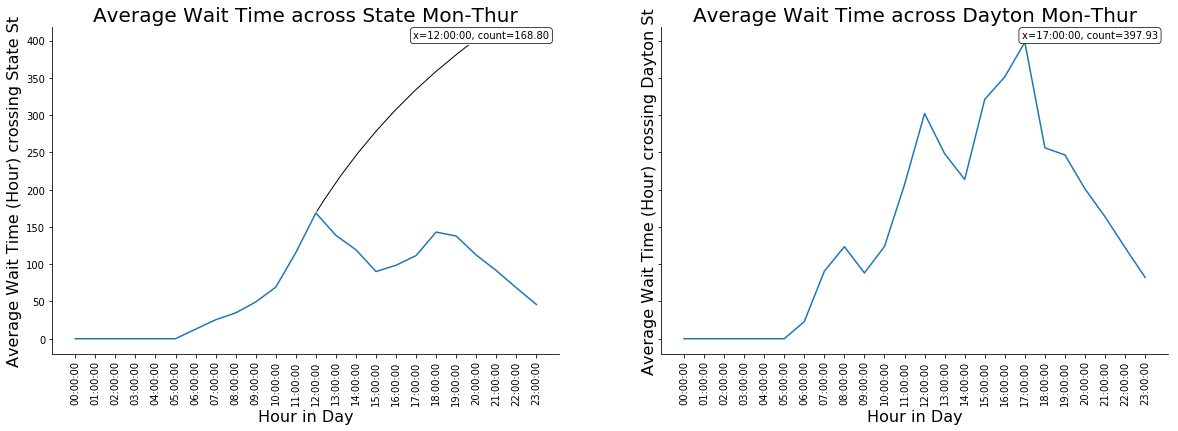

In [41]:
plot_waitTime(dayton_wait_wkd, dayton_wait_wkd.Hour, dayton_wait_wkd.total_wait_main/3600, dayton_wait_wkd.total_wait_cross/3600,
              "Average Wait Time across State Mon-Thur", "Average Wait Time across Dayton Mon-Thur")

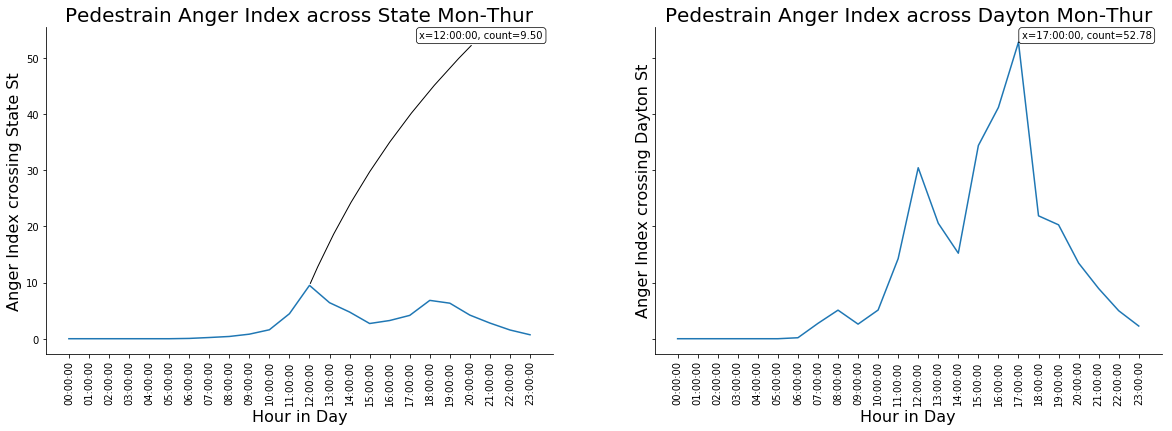

In [42]:
plot_anger(dayton_wait_wkd, dayton_wait_wkd.Hour, 
           anger_index(dayton_wait_wkd.total_wait_main/3600), anger_index(dayton_wait_wkd.total_wait_cross/3600),
              "Pedestrain Anger Index across State Mon-Thur", "Pedestrain Anger Index across Dayton Mon-Thur")

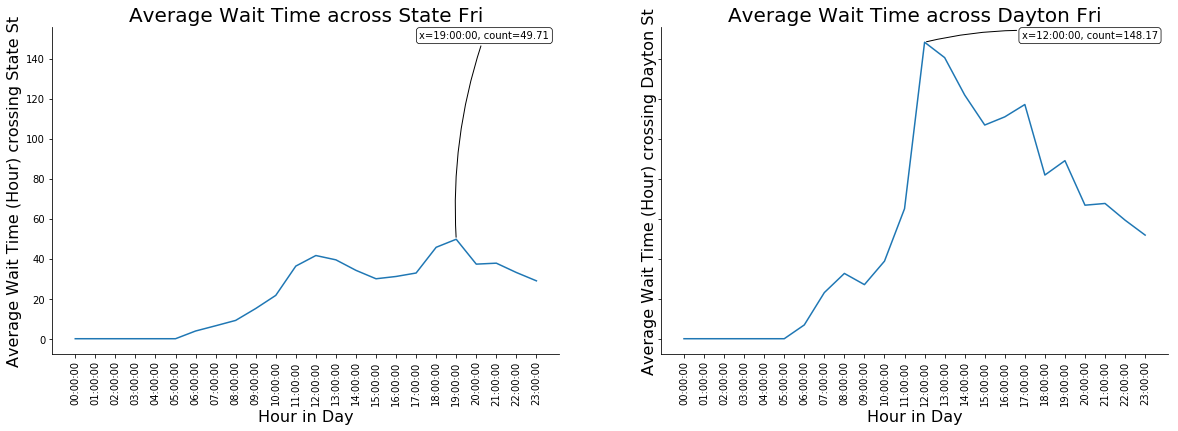

In [43]:
plot_waitTime(dayton_wait_fri, dayton_wait_fri.Hour, dayton_wait_fri.total_wait_main/3600, dayton_wait_fri.total_wait_cross/3600,
              "Average Wait Time across State Fri", "Average Wait Time across Dayton Fri")

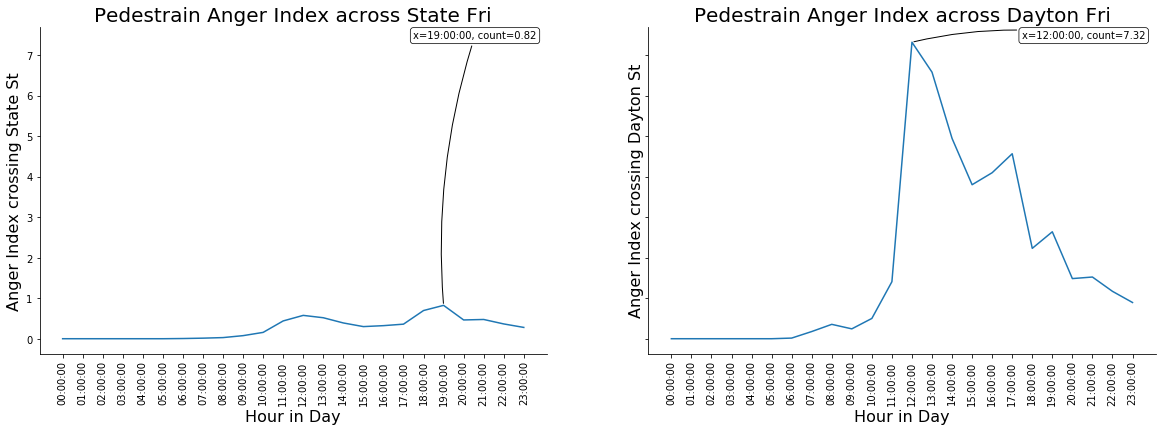

In [44]:
plot_anger(dayton_wait_fri, dayton_wait_fri.Hour, 
           anger_index(dayton_wait_fri.total_wait_main/3600), anger_index(dayton_wait_fri.total_wait_cross/3600),
              "Pedestrain Anger Index across State Fri", "Pedestrain Anger Index across Dayton Fri")

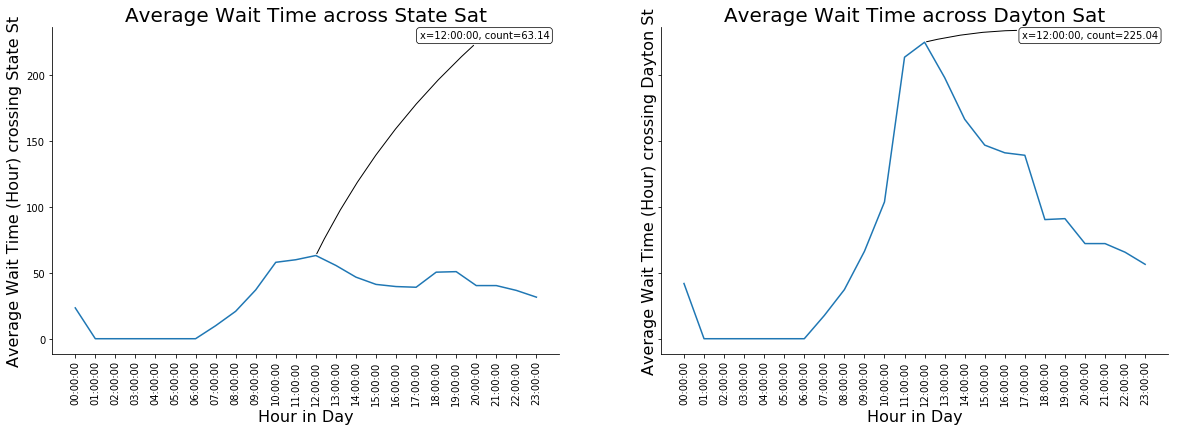

In [45]:
plot_waitTime(dayton_wait_sat, dayton_wait_sat.Hour, dayton_wait_sat.total_wait_main/3600, dayton_wait_sat.total_wait_cross/3600,
              "Average Wait Time across State Sat", "Average Wait Time across Dayton Sat")

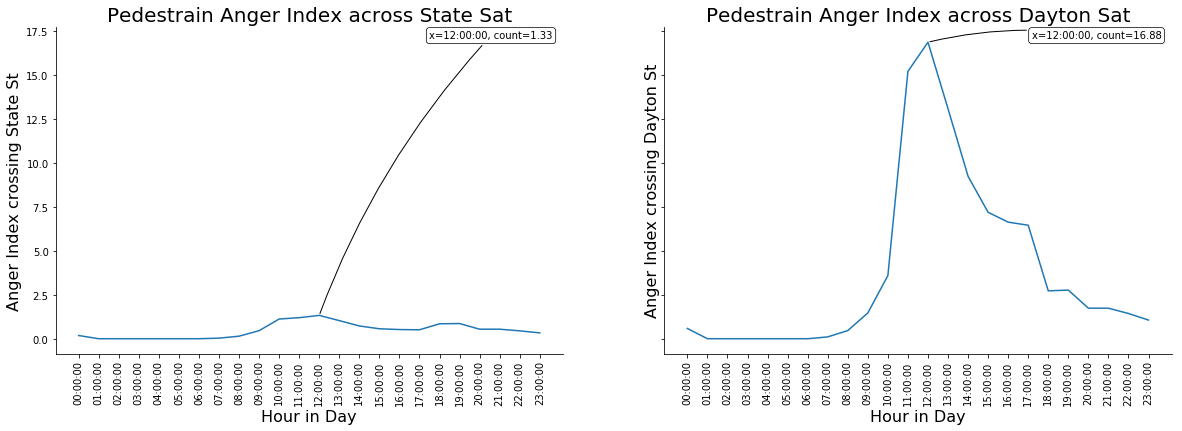

In [46]:
plot_anger(dayton_wait_sat, dayton_wait_sat.Hour, 
           anger_index(dayton_wait_sat.total_wait_main/3600), anger_index(dayton_wait_sat.total_wait_cross/3600),
              "Pedestrain Anger Index across State Sat", "Pedestrain Anger Index across Dayton Sat")

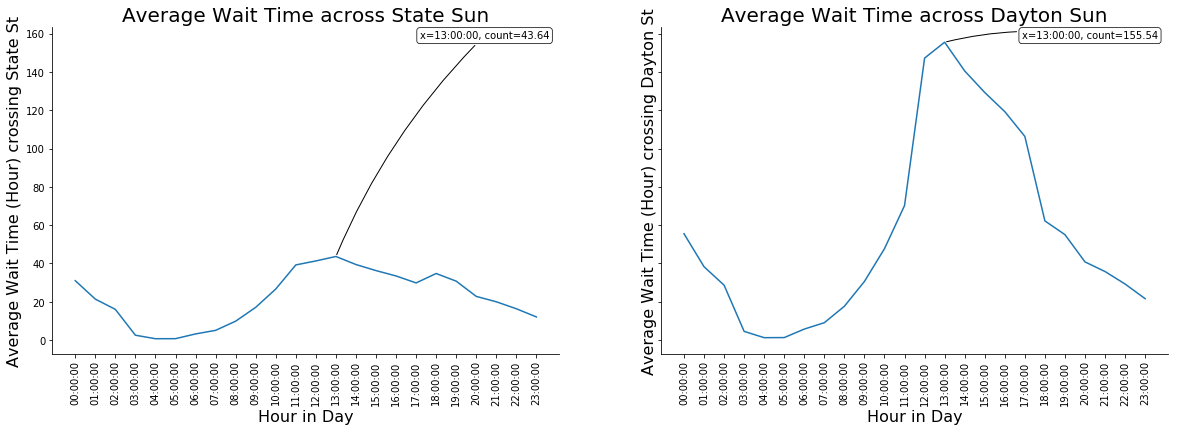

In [47]:
plot_waitTime(dayton_wait_sun, dayton_wait_sun.Hour, dayton_wait_sun.total_wait_main/3600, dayton_wait_sun.total_wait_cross/3600,
              "Average Wait Time across State Sun", "Average Wait Time across Dayton Sun")

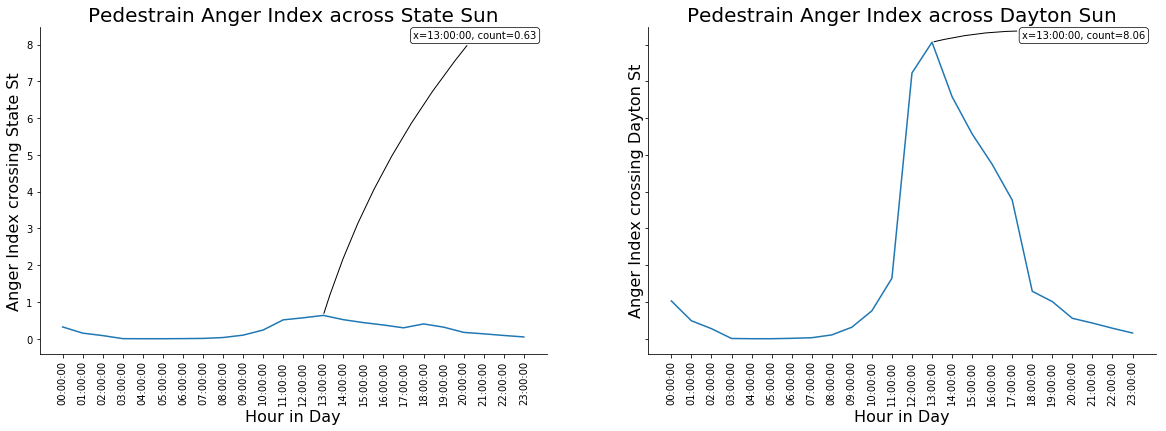

In [48]:
plot_anger(dayton_wait_sun, dayton_wait_sun.Hour, 
           anger_index(dayton_wait_sun.total_wait_main/3600), anger_index(dayton_wait_sun.total_wait_cross/3600),
              "Pedestrain Anger Index across State Sun", "Pedestrain Anger Index across Dayton Sun")

## Optimize Light Cycles 

In [49]:
from scipy.optimize import minimize

### dayton/state

In [50]:
def cost_dayton_wkd(redTimeList):
    red_main, red_cross = np.split(redTimeList, 2)  # extract two variables from the whole list
    total_cycle = red_cross + red_main - 3
    wait_count = dayton_wait_wkd.Count[6:].reset_index(drop=True)  # calculate how many pedestrian at that time
    leng = len(red_main)
    assert(len(red_main) == len(red_cross))  # should be equal to 24 if no yellow flashing
    
    cost = 0
    wait_main = []
    wait_cross = []
    for i in range(leng):
        # calculate average wait time
        wait_main.append(red_main[i]**2/(2*total_cycle[i])/3600)
        wait_cross.append(red_cross[i]**2/(2*total_cycle[i])/3600)
#         print(i)
#         print("wait main:", wait_main[i], " wait cross:", wait_cross[i], "")
#         print("wait_cnt:", wait_count[i])
        cost += (wait_count[i]*3/5 * wait_main[i])**2/3000 + (wait_count[i]*4/5 * wait_cross[i])**2/3000
    
    return cost

In [51]:
WT_dayton_wkd = np.concatenate((np.array(dayton_wait_wkd['Main Street Red (s)'])[6:], 
                                np.array(dayton_wait_wkd['Cross Street Red (s)'])[6:]))
cost_dayton_wkd(WT_dayton_wkd)

357.0277784344083

In [52]:
bound = (20, 50)  # every red time must be with in [20, 50] second bounds 
bnds_18 = []
for itr in range(18*2):
    bnds_18.append(bound)
bnds_18 = tuple(bnds_18)
len(bnds_18)

36

In [53]:
res_dayton_wkd = minimize(cost_dayton_wkd, WT_dayton_wkd, method='SLSQP', 
               bounds=bnds_18, options={'xtol': 1e-8, 'disp': True})
res_dayton_wkd.x

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 92.24613818323083
            Iterations: 60
            Function evaluations: 2280
            Gradient evaluations: 60


array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20., 20., 20., 20., 20., 20., 20., 20., 20.])

In [54]:
cost_dayton_wkd(res_dayton_wkd.x)

92.24613818323083

In [55]:
def cost_dayton_fri(redTimeList):
    red_main, red_cross = np.split(redTimeList, 2)  # extract two variables from the whole list
    total_cycle = red_cross + red_main - 3
    wait_count = dayton_wait_fri.Count[6:].reset_index(drop=True)  # calculate how many pedestrian at that time
    leng = len(red_main)
    assert(len(red_main) == len(red_cross))  # should be equal to 24 if no yellow flashing
    
    cost = 0
    wait_main = []
    wait_cross = []
    for i in range(leng):
        # calculate average wait time
        wait_main.append(red_main[i]**2/(2*total_cycle[i])/3600)
        wait_cross.append(red_cross[i]**2/(2*total_cycle[i])/3600)
#         print(i)
#         print("wait main:", wait_main[i], " wait cross:", wait_cross[i], "")
#         print("wait_cnt:", wait_count[i])
        cost += (wait_count[i]*3/5 * wait_main[i])**2/3000 + (wait_count[i]*4/5 * wait_cross[i])**2/3000
    
    return cost

In [56]:
WT_dayton_fri = np.concatenate((np.array(dayton_wait_fri['Main Street Red (s)'])[6:], 
                                np.array(dayton_wait_fri['Cross Street Red (s)'])[6:]))
cost_dayton_fri(WT_dayton_fri)

50.230423961948034

In [57]:
res_dayton_fri = minimize(cost_dayton_fri, WT_dayton_fri, method='SLSQP', 
               bounds=bnds_18, options={'xtol': 1e-8, 'disp': True})
res_dayton_fri.x

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 10.55912433065869
            Iterations: 87
            Function evaluations: 3306
            Gradient evaluations: 87


array([30.09159653, 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 26.96374922, 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        ])

In [58]:
def cost_dayton_sat(redTimeList):
    red_main, red_cross = np.split(redTimeList, 2)  # extract two variables from the whole list
    total_cycle = red_cross + red_main - 3
    tmp = pd.concat([dayton_wait_sat.Count[0:1], dayton_wait_sat.Count[7:]])
    wait_count = tmp.reset_index(drop=True)  # calculate how many pedestrian at that time
#     print(wait_count)  # delete
#     print(red_main)
    leng = len(red_main)
    assert(len(red_main) == len(red_cross))  # should be equal to 24 if no yellow flashing
    
    cost = 0
    wait_main = []
    wait_cross = []
    for i in range(leng):
        # calculate average wait time
        wait_main.append(red_main[i]**2/(2*total_cycle[i])/3600)
        wait_cross.append(red_cross[i]**2/(2*total_cycle[i])/3600)
#         print(i)
#         print("wait main:", wait_main[i], " wait cross:", wait_cross[i], "")
#         print("wait_cnt:", wait_count[i])
        cost += (wait_count[i]*3/5 * wait_main[i])**2/3000 + (wait_count[i]*4/5 * wait_cross[i])**2/3000
    
    return cost

In [59]:
tmp1 = dayton_wait_sat['Main Street Red (s)']
t1_ = pd.concat([tmp1[0:1], tmp1[7:]])
tmp2 = dayton_wait_sat['Cross Street Red (s)']
t2_ = pd.concat([tmp2[0:1], tmp2[7:]])
WT_dayton_sat = np.concatenate((np.array(t1_), 
                                np.array(t2_)))
cost_dayton_sat(WT_dayton_sat)

103.82454955391078

In [60]:
res_dayton_sat = minimize(cost_dayton_sat, WT_dayton_sat, method='SLSQP', 
               bounds=bnds_18, options={'xtol': 1e-8, 'disp': True})
res_dayton_sat.x

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 20.10469474504541
            Iterations: 72
            Function evaluations: 2736
            Gradient evaluations: 72


array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20., 20., 20., 20., 20., 20., 20., 20., 20.])

In [61]:
def cost_dayton_sun(redTimeList):
    red_main, red_cross = np.split(redTimeList, 2)  # extract two variables from the whole list
    total_cycle = red_cross + red_main - 3
    wait_count = dayton_wait_sun.Count.reset_index(drop=True)  # calculate how many pedestrian at that time
    leng = len(red_main)
    assert(len(red_main) == len(red_cross))  # should be equal to 24 if no yellow flashing
    
    cost = 0
    wait_main = []
    wait_cross = []
    for i in range(leng):
        # calculate average wait time
        wait_main.append(red_main[i]**2/(2*total_cycle[i])/3600)
        wait_cross.append(red_cross[i]**2/(2*total_cycle[i])/3600)
#         print(i)
#         print("wait main:", wait_main[i], " wait cross:", wait_cross[i], "")
#         print("wait_cnt:", wait_count[i])
        cost += (wait_count[i]*3/5 * wait_main[i])**2/3000 + (wait_count[i]*4/5 * wait_cross[i])**2/3000
    
    return cost

In [62]:
WT_dayton_sun = np.concatenate((np.array(dayton_wait_sun['Main Street Red (s)']), 
                                np.array(dayton_wait_sun['Cross Street Red (s)'])))
cost_dayton_sun(WT_dayton_sun)

49.786257436630265

In [63]:
# bnds_24
bnds_24 = []
for itr in range(24*2):
    bnds_24.append(bound)
bnds_24 = tuple(bnds_24)
len(bnds_24)

48

In [64]:
res_dayton_sun = minimize(cost_dayton_sun, WT_dayton_sun, method='SLSQP', 
               bounds=bnds_24, options={'xtol': 1e-8, 'disp': True})
res_dayton_sun.x

Iteration limit exceeded    (Exit mode 9)
            Current function value: 9.638575147630009
            Iterations: 101
            Function evaluations: 5050
            Gradient evaluations: 101


array([20.        , 20.        , 20.        , 31.38137598, 31.50194096,
       31.50204346, 31.17700179, 29.61789599, 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 33.35318976, 36.24626599, 36.22441082,
       31.66891113, 26.17803926, 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        ])

### gorham/state

In [65]:
def day_street_group(street1, street2, ped):
    sum1 = ped.groupby(ped.Hour)[street1].sum()
    sum2 = ped.groupby(ped.Hour)[street2].sum()
    return sum1 + sum2

In [66]:
gorham_wkd_sum = day_street_group("F341_State_St_", "F344_State_St_", ped_wkd)
gorham_fri_sum = day_street_group("F341_State_St_", "F344_State_St_", ped_fri)
gorham_sat_sum = day_street_group("F341_State_St_", "F344_State_St_", ped_sat)
gorham_sun_sum = day_street_group("F341_State_St_", "F344_State_St_", ped_sun)

In [67]:
wkd = [6, 6, 6, 0, 0, 6, 2, 3, 2, 1, 1, 1, 
       1, 1, 1, 4, 5, 5, 4, 1, 6, 6, 6, 6]
wt_gorham_wkd = pd.Series(wkd, index=gorham_wkd_sum.index)

fri = [6, 6, 6, 0, 0, 6, 2, 3, 2, 1, 1, 1, 
       1, 4, 4, 5, 5, 5, 4, 1, 6, 6, 6, 6]
wt_gorham_fri = pd.Series(fri, index=gorham_fri_sum.index)

sat = [6, 6, 0, 0, 0, 0, 6, 6, 6, 6, 6, 1, 
       1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6]
wt_gorham_sat = pd.Series(sat, index=gorham_sat_sum.index)

sun = [6, 6, 0, 0, 0, 0, 0, 6, 6, 6, 6, 1, 
       1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6]
wt_gorham_sun = pd.Series(sun, index=gorham_sun_sum.index)

In [68]:
Gorham_cycle['avg_wait_main'] = Gorham_cycle['Main Street Red (s)']*Gorham_cycle['Main Street Red (s)']\
    /(2*Gorham_cycle['Total Cycle Time (s)'])
Gorham_cycle['avg_wait_cross'] = Gorham_cycle['Cross Street Red (s)']*Gorham_cycle['Cross Street Red (s)']\
    /(2*Gorham_cycle['Total Cycle Time (s)'])

In [69]:
gorham_wait_wkd = construct_ped_wait(gorham_wkd_sum, wt_gorham_wkd, Gorham_cycle)
gorham_wait_fri = construct_ped_wait(gorham_fri_sum, wt_gorham_fri, Gorham_cycle)
gorham_wait_sat = construct_ped_wait(gorham_sat_sum, wt_gorham_sat, Gorham_cycle)
gorham_wait_sun = construct_ped_wait(gorham_sun_sum, wt_gorham_sun, Gorham_cycle)

In [70]:
def cost_gorham_wkd(redTimeList):
    red_main, red_cross = np.split(redTimeList, 2)  # extract two variables from the whole list
    total_cycle = red_cross + red_main - 3
    wait_count = gorham_wait_wkd.Count.reset_index(drop=True)  # calculate how many pedestrian at that time
    leng = len(red_main)
    assert(len(red_main) == len(red_cross))  # should be equal to 24 if no yellow flashing
    
    cost = 0
    wait_main = []
    wait_cross = []
    for i in range(leng):
        # calculate average wait time
        wait_main.append(red_main[i]**2/(2*total_cycle[i])/3600)
        wait_cross.append(red_cross[i]**2/(2*total_cycle[i])/3600)
        cost += (wait_count[i]*3/5 * wait_main[i])**2/3000 + (wait_count[i]*4/5 * wait_cross[i])**2/3000
    
    return cost

In [71]:
WT_gorham_wkd = np.concatenate((np.array(gorham_wait_wkd['Main Street Red (s)']),
                                np.array(gorham_wait_wkd['Cross Street Red (s)'])))
WT_gorham_wkd = np.nan_to_num(WT_gorham_wkd)  # we also put flashing period into the function, so there will be nan in the np array
cost_gorham_wkd(WT_gorham_wkd)

1859.3052288335975

In [72]:
res_gorham_wkd = minimize(cost_gorham_wkd, WT_gorham_wkd, method='SLSQP', 
               bounds=bnds_24, options={'xtol': 1e-8, 'disp': True})
res_gorham_wkd.x

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 153.05451277328837
            Iterations: 99
            Function evaluations: 4950
            Gradient evaluations: 99


array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20., 20., 20., 20., 20., 20., 20., 20.])

In [73]:
def cost_gorham_fri(redTimeList):
    red_main, red_cross = np.split(redTimeList, 2)  # extract two variables from the whole list
    total_cycle = red_cross + red_main - 3
    wait_count = gorham_wait_fri.Count.reset_index(drop=True)  # calculate how many pedestrian at that time
    leng = len(red_main)
    assert(len(red_main) == len(red_cross))  # should be equal to 24 if no yellow flashing
    
    cost = 0
    wait_main = []
    wait_cross = []
    for i in range(leng):
        # calculate average wait time
        wait_main.append(red_main[i]**2/(2*total_cycle[i])/3600)
        wait_cross.append(red_cross[i]**2/(2*total_cycle[i])/3600)
        cost += (wait_count[i]*3/5 * wait_main[i])**2/3000 + (wait_count[i]*4/5 * wait_cross[i])**2/3000
    
    return cost

In [74]:
WT_gorham_fri = np.concatenate((np.array(gorham_wait_fri['Main Street Red (s)']),
                                np.array(gorham_wait_fri['Cross Street Red (s)'])))
WT_gorham_fri = np.nan_to_num(WT_gorham_fri)  # we also put flashing period into the function, so there will be nan in the np array
cost_gorham_fri(WT_gorham_fri)

236.64625229363176

In [75]:
res_gorham_fri = minimize(cost_gorham_fri, WT_gorham_fri, method='SLSQP', 
               bounds=bnds_24, options={'xtol': 1e-8, 'disp': True, 'maxiter': 300})
res_gorham_fri.x

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 17.63018462193393
            Iterations: 122
            Function evaluations: 6100
            Gradient evaluations: 122


array([20.        , 20.        , 20.        , 20.        , 20.        ,
       29.63220508, 32.43272082, 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 46.83704955,
       33.24574564, 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        ])

In [76]:
def cost_gorham_sat(redTimeList):
    red_main, red_cross = np.split(redTimeList, 2)  # extract two variables from the whole list
    total_cycle = red_cross + red_main - 3
    wait_count = gorham_wait_sat.Count.reset_index(drop=True)  # calculate how many pedestrian at that time
    leng = len(red_main)
    assert(len(red_main) == len(red_cross))  # should be equal to 24 if no yellow flashing
    
    cost = 0
    wait_main = []
    wait_cross = []
    for i in range(leng):
        # calculate average wait time
        wait_main.append(red_main[i]**2/(2*total_cycle[i])/3600)
        wait_cross.append(red_cross[i]**2/(2*total_cycle[i])/3600)
        cost += (wait_count[i]*3/5 * wait_main[i])**2/3000 + (wait_count[i]*4/5 * wait_cross[i])**2/3000
    
    return cost

In [77]:
WT_gorham_sat = np.concatenate((np.array(gorham_wait_sat['Main Street Red (s)']),
                                np.array(gorham_wait_sat['Cross Street Red (s)'])))
WT_gorham_sat = np.nan_to_num(WT_gorham_sat)  # we also put flashing period into the function, so there will be nan in the np array
cost_gorham_sat(WT_gorham_sat)

229.94510361513503

In [78]:
res_gorham_sat = minimize(cost_gorham_sat, WT_gorham_sat, method='SLSQP', 
               bounds=bnds_24, options={'xtol': 1e-8, 'disp': True, 'maxiter': 100})
res_gorham_sat.x

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 28.031951780536424
            Iterations: 82
            Function evaluations: 4100
            Gradient evaluations: 82


array([20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 32.88844961, 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       29.43116666, 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        ])

In [79]:
def cost_gorham_sun(redTimeList):
    red_main, red_cross = np.split(redTimeList, 2)  # extract two variables from the whole list
    total_cycle = red_cross + red_main - 3
    wait_count = gorham_wait_sun.Count.reset_index(drop=True)  # calculate how many pedestrian at that time
    leng = len(red_main)
    assert(len(red_main) == len(red_cross))  # should be equal to 24 if no yellow flashing
    
    cost = 0
    wait_main = []
    wait_cross = []
    for i in range(leng):
        # calculate average wait time
        wait_main.append(red_main[i]**2/(2*total_cycle[i])/3600)
        wait_cross.append(red_cross[i]**2/(2*total_cycle[i])/3600)
        cost += (wait_count[i]*3/5 * wait_main[i])**2/3000 + (wait_count[i]*4/5 * wait_cross[i])**2/3000
    
    return cost

In [80]:
WT_gorham_sun = np.concatenate((np.array(gorham_wait_sun['Main Street Red (s)']),
                                np.array(gorham_wait_sun['Cross Street Red (s)'])))
WT_gorham_sun = np.nan_to_num(WT_gorham_sun)  # we also put flashing period into the function, so there will be nan in the np array
cost_gorham_sun(WT_gorham_sun)

122.73823489954079

In [81]:
res_gorham_sun = minimize(cost_gorham_sun, WT_gorham_sun, method='SLSQP', 
               bounds=bnds_24, options={'xtol': 1e-8, 'disp': True, 'maxiter': 200})
res_gorham_sun.x

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 15.089047334435788
            Iterations: 114
            Function evaluations: 5700
            Gradient evaluations: 114


array([20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 30.83433849, 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        ])

### johnson/state

In [82]:
johnson_wkd_sum = day_street_group("F200_State_St____Goodman_s", "F200_State_St____Art_Center", ped_wkd)
johnson_fri_sum = day_street_group("F200_State_St____Goodman_s", "F200_State_St____Art_Center", ped_fri)
johnson_sat_sum = day_street_group("F200_State_St____Goodman_s", "F200_State_St____Art_Center", ped_sat)
johnson_sun_sum = day_street_group("F200_State_St____Goodman_s", "F200_State_St____Art_Center", ped_sun)

In [83]:
wt_johnson_wkd = calc_wait(Johnson_wkd, johnson_wkd_sum)
wt_johnson_fri = calc_wait(Johnson_fri, johnson_fri_sum)
wt_johnson_sat = calc_wait(Johnson_sat, johnson_sat_sum)
wt_johnson_sun = calc_wait(Johnson_sun, johnson_sun_sum)

In [84]:
Johnson_cycle['avg_wait_main'] = Johnson_cycle['Main Street Red (s)']*Johnson_cycle['Main Street Red (s)']\
    /(2*Johnson_cycle['Total Cycle Time (s)'])
Johnson_cycle['avg_wait_cross'] = Johnson_cycle['Cross Street Red (s)']*Johnson_cycle['Cross Street Red (s)']\
    /(2*Johnson_cycle['Total Cycle Time (s)'])

In [85]:
johnson_wait_wkd = construct_ped_wait(johnson_wkd_sum, wt_johnson_wkd, Johnson_cycle)
johnson_wait_fri = construct_ped_wait(johnson_fri_sum, wt_johnson_fri, Johnson_cycle)
johnson_wait_sat = construct_ped_wait(johnson_sat_sum, wt_johnson_sat, Johnson_cycle)
johnson_wait_sun = construct_ped_wait(johnson_sun_sum, wt_johnson_sun, Johnson_cycle)

In [86]:
def cost_johnson_wkd(redTimeList):
    red_main, red_cross = np.split(redTimeList, 2)  # extract two variables from the whole list
    total_cycle = red_cross + red_main - 3
    wait_count = johnson_wait_wkd.Count.reset_index(drop=True)  # calculate how many pedestrian at that time
    leng = len(red_main)
    assert(len(red_main) == len(red_cross))  # should be equal to 24 if no yellow flashing
    
    cost = 0
    wait_main = []
    wait_cross = []
    for i in range(leng):
        # calculate average wait time
        wait_main.append(red_main[i]**2/(2*total_cycle[i])/3600)
        wait_cross.append(red_cross[i]**2/(2*total_cycle[i])/3600)
        cost += (wait_count[i]*3/5 * wait_main[i])**2/3000 + (wait_count[i]*4/5 * wait_cross[i])**2/3000
    
    return cost

In [87]:
WT_johnson_wkd = np.concatenate((np.array(johnson_wait_wkd['Main Street Red (s)']),
                                np.array(johnson_wait_wkd['Cross Street Red (s)'])))
WT_johnson_wkd = np.nan_to_num(WT_johnson_wkd)  # we also put flashing period into the function, so there will be nan in the np array
cost_johnson_wkd(WT_johnson_wkd)

1000.0035968390108

In [88]:
res_johnson_wkd = minimize(cost_johnson_wkd, WT_johnson_wkd, method='SLSQP', 
               bounds=bnds_24, options={'xtol': 1e-8, 'disp': True})
res_johnson_wkd.x

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 66.74212467779475
            Iterations: 92
            Function evaluations: 4600
            Gradient evaluations: 92


array([20.        , 20.        , 20.        , 20.        , 20.        ,
       32.34772499, 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 22.17931024,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        ])

In [89]:
def cost_johnson_fri(redTimeList):
    red_main, red_cross = np.split(redTimeList, 2)  # extract two variables from the whole list
    total_cycle = red_cross + red_main - 3
    wait_count = johnson_wait_fri.Count.reset_index(drop=True)  # calculate how many pedestrian at that time
    leng = len(red_main)
    assert(len(red_main) == len(red_cross))  # should be equal to 24 if no yellow flashing
    
    cost = 0
    wait_main = []
    wait_cross = []
    for i in range(leng):
        # calculate average wait time
        wait_main.append(red_main[i]**2/(2*total_cycle[i])/3600)
        wait_cross.append(red_cross[i]**2/(2*total_cycle[i])/3600)
        cost += (wait_count[i]*3/5 * wait_main[i])**2/3000 + (wait_count[i]*4/5 * wait_cross[i])**2/3000
    
    return cost

In [90]:
WT_johnson_fri = np.concatenate((np.array(johnson_wait_fri['Main Street Red (s)']),
                                np.array(johnson_wait_fri['Cross Street Red (s)'])))
WT_johnson_fri = np.nan_to_num(WT_johnson_fri)  # we also put flashing period into the function, so there will be nan in the np array
cost_johnson_fri(WT_johnson_fri)

115.98156358781422

In [91]:
res_johnson_fri = minimize(cost_johnson_fri, WT_johnson_fri, method='SLSQP', 
               bounds=bnds_24, options={'xtol': 1e-8, 'disp': True, 'maxiter': 240})
res_johnson_fri.x

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.359669997692406
            Iterations: 149
            Function evaluations: 7450
            Gradient evaluations: 149


array([20.        , 20.        , 21.1566161 , 20.        , 20.        ,
       25.96519   , 29.22618493, 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 45.58694444,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        ])

In [92]:
def cost_johnson_sat(redTimeList):
    red_main, red_cross = np.split(redTimeList, 2)  # extract two variables from the whole list
    total_cycle = red_cross + red_main - 3
    wait_count = johnson_wait_sat.Count.reset_index(drop=True)  # calculate how many pedestrian at that time
    leng = len(red_main)
    assert(len(red_main) == len(red_cross))  # should be equal to 24 if no yellow flashing
    
    cost = 0
    wait_main = []
    wait_cross = []
    for i in range(leng):
        # calculate average wait time
        wait_main.append(red_main[i]**2/(2*total_cycle[i])/3600)
        wait_cross.append(red_cross[i]**2/(2*total_cycle[i])/3600)
        cost += (wait_count[i]*3/5 * wait_main[i])**2/3000 + (wait_count[i]*4/5 * wait_cross[i])**2/3000
    
    return cost

In [93]:
WT_johnson_sat = np.concatenate((np.array(johnson_wait_sat['Main Street Red (s)']),
                                np.array(johnson_wait_sat['Cross Street Red (s)'])))
WT_johnson_sat = np.nan_to_num(WT_johnson_sat)  # we also put flashing period into the function, so there will be nan in the np array
cost_johnson_sat(WT_johnson_sat)

134.53800327081453

In [94]:
res_johnson_sat = minimize(cost_johnson_sat, WT_johnson_sat, method='SLSQP', 
               bounds=bnds_24, options={'xtol': 1e-8, 'disp': True, 'maxiter': 200})
res_johnson_sat.x

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 12.23725661687213
            Iterations: 117
            Function evaluations: 5851
            Gradient evaluations: 117


array([20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 30.89110709, 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        ])

In [95]:
def cost_johnson_sun(redTimeList):
    red_main, red_cross = np.split(redTimeList, 2)  # extract two variables from the whole list
    total_cycle = red_cross + red_main - 3
    wait_count = johnson_wait_sun.Count.reset_index(drop=True)  # calculate how many pedestrian at that time
    leng = len(red_main)
    assert(len(red_main) == len(red_cross))  # should be equal to 24 if no yellow flashing
    
    cost = 0
    wait_main = []
    wait_cross = []
    for i in range(leng):
        # calculate average wait time
        wait_main.append(red_main[i]**2/(2*total_cycle[i])/3600)
        wait_cross.append(red_cross[i]**2/(2*total_cycle[i])/3600)
        cost += (wait_count[i]*3/5 * wait_main[i])**2/3000 + (wait_count[i]*4/5 * wait_cross[i])**2/3000
    
    return cost

In [96]:
WT_johnson_sun = np.concatenate((np.array(johnson_wait_sun['Main Street Red (s)']),
                                np.array(johnson_wait_sun['Cross Street Red (s)'])))
WT_johnson_sun = np.nan_to_num(WT_johnson_sun)  # we also put flashing period into the function, so there will be nan in the np array
cost_johnson_sun(WT_johnson_sun)

69.21231069260132

In [97]:
res_johnson_sun = minimize(cost_johnson_sun, WT_johnson_sun, method='SLSQP', 
               bounds=bnds_24, options={'xtol': 1e-8, 'disp': True, 'maxiter': 200})
res_johnson_sun.x

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6.260861003929755
            Iterations: 144
            Function evaluations: 7200
            Gradient evaluations: 144


array([20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 28.72529141, 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        ])

## Optimized Result

### dayton

In [98]:
opt_dayton_wait_wkd = dayton_wait_wkd.copy()
opt_dayton_wait_wkd.tail()

,Count,Pattern,Hour,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s),avg_wait_main,avg_wait_cross,total_wait_main,total_wait_cross
19,108295,6,19:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077,495949.448077,887852.392308
20,88262,6,20:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077,404206.013077,723612.612308
21,71878,6,21:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077,329173.594615,589289.018462
22,53681,6,22:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077,245838.333462,440101.613846
23,36138,6,23:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077,165498.140769,296276.003077


In [99]:
opt_dayton_wait_wkd

,Count,Pattern,Hour,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s),avg_wait_main,avg_wait_cross,total_wait_main,total_wait_cross
0,23691,0,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00
1,16975,0,01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00
2,10607,0,02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00
3,2406,0,03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00
4,1509,0,04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00
5,2870,0,05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00
6,10066,6,06:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077,46098.408462,8.252571e+04
7,24591,3,07:00:00,80.0,31.5,3.0,45.5,50.0,51.5,3.0,25.5,30.0,6.201562,16.576563,91501.574062,3.261074e+05
8,33538,3,08:00:00,80.0,31.5,3.0,45.5,50.0,51.5,3.0,25.5,30.0,6.201562,16.576563,124792.801875,4.447558e+05
9,38773,1,09:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077,177565.427308,3.178789e+05


In [100]:
opt_programs = pd.read_excel('new_cycle.xlsx', sheet_name='Programs')
opt_patterns = pd.read_excel('new_cycle.xlsx', sheet_name='Patterns')

In [101]:
opt_programs.head()

,Intersection,Day Type,Start Time,Pattern
0,State and Dayton,Monday - Thursday,00:30:00,Flash
1,State and Dayton,Monday - Thursday,06:00:00,10
2,State and Dayton,Friday,00:30:00,Flash
3,State and Dayton,Friday,06:00:00,11
4,State and Dayton,Friday,07:00:00,10


In [102]:
opt_patterns.head()

,Intersection,Pattern,Main Street,Cross Street,Cycle Offset (s),Total Cycle Time (s),Main Street Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Do Not Walk (s),Main Street Flashing Do Not Walk (s),Main Street Walk (s),Cross Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Do Not Walk (s),Cross Street Flashing Do Not Walk (s),Cross Street Walk (s)
0,State and Dayton,1,Dayton/Fairchild,State,30,65.0,35.0,1.5,3.0,30.5,4.5,7,23.5,30.0,1.5,3.0,25.5,4.5,12,13.5
1,State and Dayton,3,Dayton/Fairchild,State,6,80.0,50.0,1.5,3.0,45.5,4.5,7,38.5,30.0,1.5,3.0,25.5,4.5,12,13.5
2,State and Dayton,5,Dayton/Fairchild,State,21,80.0,50.0,1.5,3.0,45.5,4.5,7,38.5,30.0,1.5,3.0,25.5,4.5,12,13.5
3,State and Dayton,6,Dayton/Fairchild,State,32,65.0,35.0,1.5,3.0,30.5,4.5,7,23.5,30.0,1.5,3.0,25.5,4.5,12,13.5
4,State and Dayton,10,Dayton/Fairchild,State,0,40.0,20.0,1.5,3.0,15.5,4.5,7,8.5,20.0,1.5,3.0,15.5,4.5,7,8.5


In [103]:
opt_dayton_wait_wkd.iloc[6:]

,Count,Pattern,Hour,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s),avg_wait_main,avg_wait_cross,total_wait_main,total_wait_cross
6,10066,6,06:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077,46098.408462,8.252571e+04
7,24591,3,07:00:00,80.0,31.5,3.0,45.5,50.0,51.5,3.0,25.5,30.0,6.201562,16.576563,91501.574062,3.261074e+05
8,33538,3,08:00:00,80.0,31.5,3.0,45.5,50.0,51.5,3.0,25.5,30.0,6.201562,16.576563,124792.801875,4.447558e+05
9,38773,1,09:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077,177565.427308,3.178789e+05
10,54359,1,10:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077,248943.312692,4.456602e+05
11,90845,1,11:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077,416035.159615,7.447892e+05
12,132693,1,12:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077,607682.904231,1.087878e+06
13,109045,1,13:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077,499384.159615,8.940012e+05
14,93843,1,14:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077,429764.846538,7.693682e+05
15,87201,5,15:00:00,80.0,31.5,3.0,45.5,50.0,51.5,3.0,25.5,30.0,6.201562,16.576563,324469.470937,1.156394e+06


In [104]:
for it in range(6, 24, 1):
    opt_dayton_wait_wkd['Total Cycle Time (s)'][it] = 40
    opt_dayton_wait_wkd['Main Street Total Cycle Time (s)'][it] = 20
    opt_dayton_wait_wkd['Main Street Red (s)'][it] = 21.5
    opt_dayton_wait_wkd['Main Street Green (s)'][it] = 15.5
    opt_dayton_wait_wkd['Cross Street Total Cycle Time (s)'][it] = 20
    opt_dayton_wait_wkd['Cross Street Red (s)'][it] = 21.5
    opt_dayton_wait_wkd['Cross Street Green (s)'][it] = 15.5
opt_dayton_wait_wkd

,Count,Pattern,Hour,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s),avg_wait_main,avg_wait_cross,total_wait_main,total_wait_cross
0,23691,0,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00
1,16975,0,01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00
2,10607,0,02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00
3,2406,0,03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00
4,1509,0,04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00
5,2870,0,05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00
6,10066,6,06:00:00,40.0,21.5,3.0,15.5,20.0,21.5,3.0,15.5,20.0,7.632692,10.248077,46098.408462,8.252571e+04
7,24591,3,07:00:00,40.0,21.5,3.0,15.5,20.0,21.5,3.0,15.5,20.0,6.201562,16.576563,91501.574062,3.261074e+05
8,33538,3,08:00:00,40.0,21.5,3.0,15.5,20.0,21.5,3.0,15.5,20.0,6.201562,16.576563,124792.801875,4.447558e+05
9,38773,1,09:00:00,40.0,21.5,3.0,15.5,20.0,21.5,3.0,15.5,20.0,7.632692,10.248077,177565.427308,3.178789e+05


In [105]:
opt_dayton_wait_wkd['avg_wait_main'] = opt_dayton_wait_wkd['Main Street Red (s)']*opt_dayton_wait_wkd['Main Street Red (s)']\
    /(2*opt_dayton_wait_wkd['Total Cycle Time (s)'])
opt_dayton_wait_wkd['avg_wait_cross'] = opt_dayton_wait_wkd['Cross Street Red (s)']*opt_dayton_wait_wkd['Cross Street Red (s)']\
    /(2*opt_dayton_wait_wkd['Total Cycle Time (s)'])
opt_dayton_wait_wkd

,Count,Pattern,Hour,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s),avg_wait_main,avg_wait_cross,total_wait_main,total_wait_cross
0,23691,0,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00
1,16975,0,01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00
2,10607,0,02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00
3,2406,0,03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00
4,1509,0,04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00
5,2870,0,05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00
6,10066,6,06:00:00,40.0,21.5,3.0,15.5,20.0,21.5,3.0,15.5,20.0,5.778125,5.778125,46098.408462,8.252571e+04
7,24591,3,07:00:00,40.0,21.5,3.0,15.5,20.0,21.5,3.0,15.5,20.0,5.778125,5.778125,91501.574062,3.261074e+05
8,33538,3,08:00:00,40.0,21.5,3.0,15.5,20.0,21.5,3.0,15.5,20.0,5.778125,5.778125,124792.801875,4.447558e+05
9,38773,1,09:00:00,40.0,21.5,3.0,15.5,20.0,21.5,3.0,15.5,20.0,5.778125,5.778125,177565.427308,3.178789e+05


In [106]:
opt_dayton_wait_wkd['total_wait_main'] = opt_dayton_wait_wkd['avg_wait_main']*opt_dayton_wait_wkd.Count*3/5
opt_dayton_wait_wkd['total_wait_cross'] = opt_dayton_wait_wkd['avg_wait_cross']*opt_dayton_wait_wkd.Count*4/5

In [107]:
def filNan(wait_):
    wait_['avg_wait_main'] = wait_['avg_wait_main'].fillna(0)
    wait_['avg_wait_cross'] = wait_['avg_wait_cross'].fillna(0)
    wait_['total_wait_main'] = wait_['total_wait_main'].fillna(0)
    wait_['total_wait_cross'] = wait_['total_wait_cross'].fillna(0)
    return wait_

In [108]:
opt_dayton_wait_wkd = filNan(opt_dayton_wait_wkd)
opt_dayton_wait_wkd.head()

,Count,Pattern,Hour,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s),avg_wait_main,avg_wait_cross,total_wait_main,total_wait_cross
0,23691,0,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,16975,0,01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,10607,0,02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,2406,0,03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,1509,0,04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


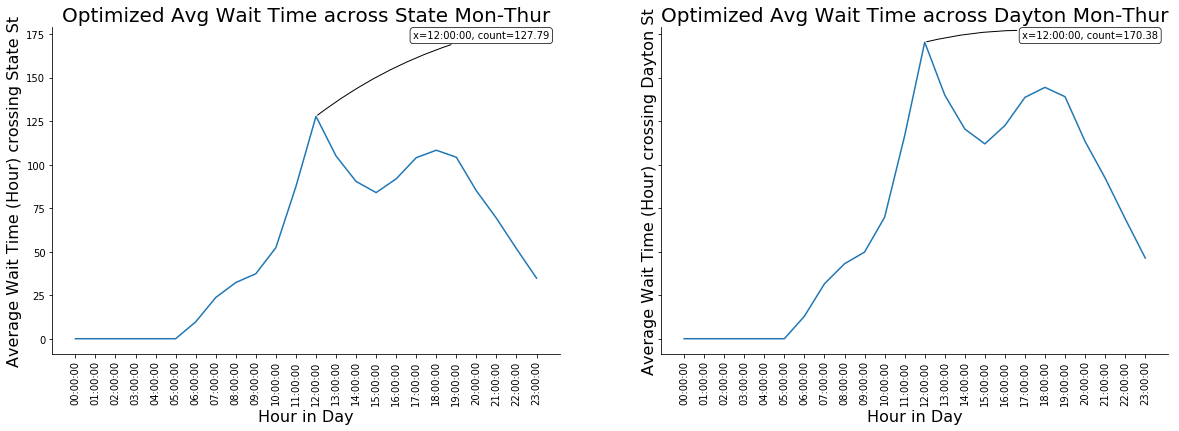

In [109]:
plot_waitTime(opt_dayton_wait_wkd, opt_dayton_wait_wkd.Hour, 
              opt_dayton_wait_wkd.total_wait_main/3600, opt_dayton_wait_wkd.total_wait_cross/3600,
              "Optimized Avg Wait Time across State Mon-Thur", "Optimized Avg Wait Time across Dayton Mon-Thur")

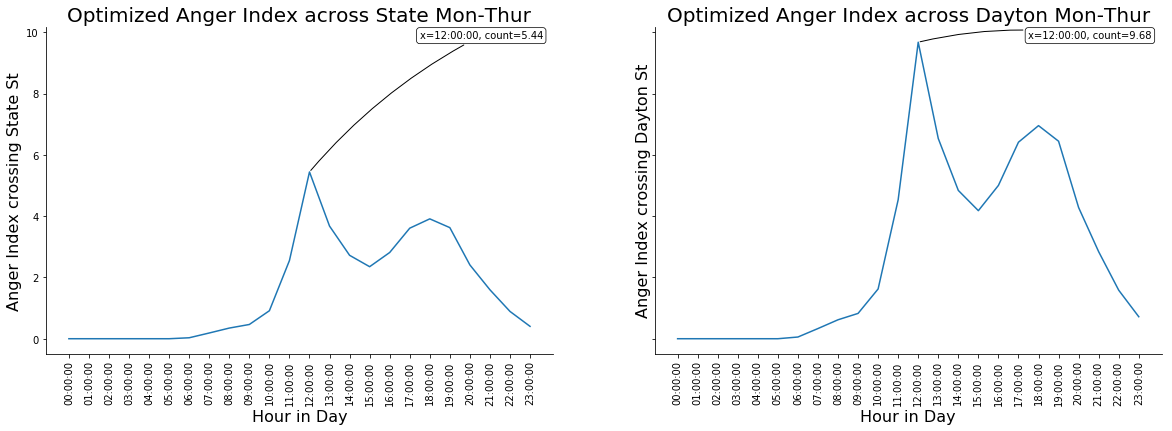

In [110]:
plot_anger(opt_dayton_wait_wkd, opt_dayton_wait_wkd.Hour, 
           anger_index(opt_dayton_wait_wkd.total_wait_main/3600), anger_index(opt_dayton_wait_wkd.total_wait_cross/3600),
              "Optimized Anger Index across State Mon-Thur", "Optimized Anger Index across Dayton Mon-Thur")

In [111]:
opt_dayton_wait_wkd['total_wt_main_hour'] = opt_dayton_wait_wkd.total_wait_main/3600
opt_dayton_wait_wkd['total_wt_cross_hour'] = opt_dayton_wait_wkd.total_wait_cross/3600

In [112]:
# dayton_wait_wkd
dayton_wait_wkd['total_wt_main_hour'] = dayton_wait_wkd.total_wait_main/3600
dayton_wait_wkd['total_wt_cross_hour'] = dayton_wait_wkd.total_wait_cross/3600

In [113]:
import math
def plot_wt_overlay(df, opt_df, title, title2):
    fig, axes = plt.subplots(ncols=2, figsize=(20,6), sharex=True, sharey=True)
    
    ax2 = axes[0]
    ax2.plot(df.Hour, df.total_wt_main_hour, label='current')
    ax2.plot(opt_df.Hour, opt_df.total_wt_main_hour, label='optimized')
    ax2.set_title(title, fontsize=20)
    ax2.set_xticklabels(df.Hour, rotation=90)
    ax2.set_xlabel("Hour in Day", fontsize=16)
    ax2.set_ylabel("Average Wait Time (Hour)", fontsize=16)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
#     annot_max(df.Hour, df.total_wt_main_hour, ax2)
    ax2.legend(loc=2)
    
    ax = axes[1]
    ax.plot(df.Hour, df.total_wt_cross_hour, label='current')
    ax.plot(opt_df.Hour, opt_df.total_wt_cross_hour, label='optimized')
    ax.set_title(title2, fontsize=20)
    ax.set_xticklabels(df.Hour, rotation=90)
    ax.set_xlabel("Hour in Day", fontsize=16)
#     ax.set_ylabel("Average Wait Time (Hour)", fontsize=16)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#     annot_max(df.Hour, df.total_wt_cross_hour, ax)

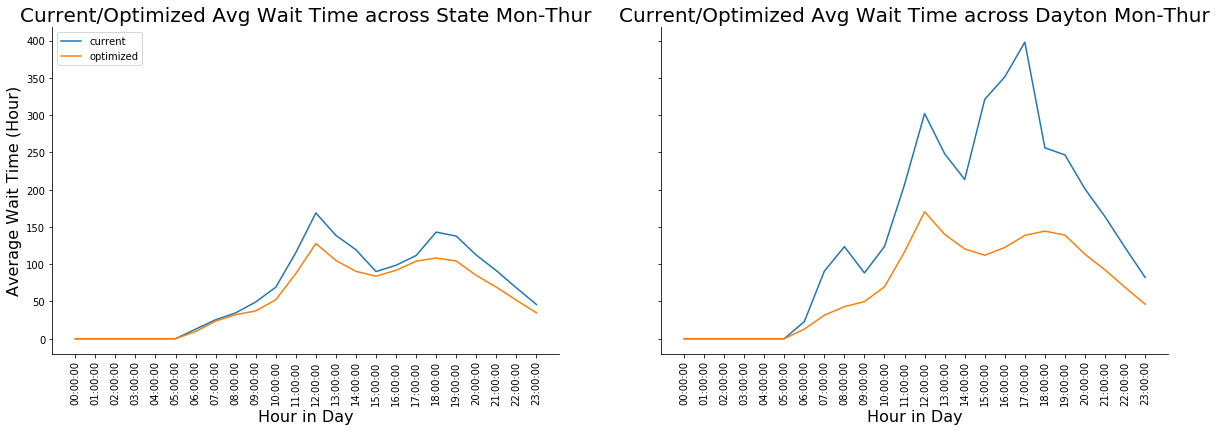

In [114]:
plot_wt_overlay(dayton_wait_wkd, opt_dayton_wait_wkd,
              "Current/Optimized Avg Wait Time across State Mon-Thur", "Current/Optimized Avg Wait Time across Dayton Mon-Thur")

In [115]:
opt_dayton_wait_wkd["save_hour"] = (dayton_wait_wkd["total_wt_main_hour"] + dayton_wait_wkd["total_wt_cross_hour"]) \
                                  - (opt_dayton_wait_wkd["total_wt_main_hour"] + opt_dayton_wait_wkd["total_wt_main_hour"]) 
opt_dayton_wait_wkd["save_pct"] = opt_dayton_wait_wkd["save_hour"] / \
                                    (dayton_wait_wkd["total_wt_main_hour"] + dayton_wait_wkd["total_wt_cross_hour"])*100
opt_dayton_wait_wkd["save_hour"] = opt_dayton_wait_wkd["save_hour"].fillna(0)
opt_dayton_wait_wkd["save_pct"] = opt_dayton_wait_wkd["save_pct"].fillna(0)
opt_dayton_wait_wkd

,Count,Pattern,Hour,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s),avg_wait_main,avg_wait_cross,total_wait_main,total_wait_cross,total_wt_main_hour,total_wt_cross_hour,save_hour,save_pct
0,23691,0,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
1,16975,0,01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
2,10607,0,02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
3,2406,0,03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
4,1509,0,04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
5,2870,0,05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
6,10066,6,06:00:00,40.0,21.5,3.0,15.5,20.0,21.5,3.0,15.5,20.0,5.778125,5.778125,34897.563750,46530.0850,9.693768,12.925024,16.341387,45.737140
7,24591,3,07:00:00,40.0,21.5,3.0,15.5,20.0,21.5,3.0,15.5,20.0,5.778125,5.778125,85253.923125,113671.8975,23.681645,31.575527,68.639202,59.170454
8,33538,3,08:00:00,40.0,21.5,3.0,15.5,20.0,21.5,3.0,15.5,20.0,5.778125,5.778125,116272.053750,155029.4050,32.297793,43.063724,93.612360,59.170454
9,38773,1,09:00:00,40.0,21.5,3.0,15.5,20.0,21.5,3.0,15.5,20.0,5.778125,5.778125,134421.144375,179228.1925,37.339207,49.785609,62.945024,45.737140


In [116]:
# plt.plot(opt_dayton_wait_wkd.save_pct)
# plt.hist(opt_dayton_wait_wkd.save_hour)

In [117]:
def fill_pat10(df, start, end):
    for it in range(start, end, 1):
        df['Total Cycle Time (s)'][it] = 40
        df['Main Street Total Cycle Time (s)'][it] = 20
        df['Main Street Red (s)'][it] = 21.5
        df['Main Street Green (s)'][it] = 15.5
        df['Cross Street Total Cycle Time (s)'][it] = 20
        df['Cross Street Red (s)'][it] = 21.5
        df['Cross Street Green (s)'][it] = 15.5
    return df

In [118]:
def fill_pat11(df, start, end):
    for it in range(start, end, 1):
        df['Total Cycle Time (s)'][it] = 57
        df['Main Street Total Cycle Time (s)'][it] = 27
        df['Main Street Red (s)'][it] = 31.5
        df['Main Street Green (s)'][it] = 22.5
        df['Cross Street Total Cycle Time (s)'][it] = 30
        df['Cross Street Red (s)'][it] = 28.5
        df['Cross Street Green (s)'][it] = 25.5
    return df

In [119]:
def opt_wait_process(df):
    df['avg_wait_main'] = df['Main Street Red (s)']*df['Main Street Red (s)']\
    /(2*df['Total Cycle Time (s)'])
    df['avg_wait_cross'] = df['Cross Street Red (s)']*df['Cross Street Red (s)']\
    /(2*df['Total Cycle Time (s)'])
    
    df['total_wait_main'] = df['avg_wait_main']*df.Count*3/5
    df['total_wait_cross'] = df['avg_wait_cross']*df.Count*4/5
    df = filNan(df)
    
    df['total_wt_main_hour'] = df.total_wait_main/3600
    df['total_wt_cross_hour'] = df.total_wait_cross/3600

    return df 

In [120]:
opt_dayton_wait_fri = dayton_wait_fri.copy()

opt_dayton_wait_fri = fill_pat11(opt_dayton_wait_fri, 6, 7)
opt_dayton_wait_fri = fill_pat10(opt_dayton_wait_fri, 7, 24)
opt_dayton_wait_fri = opt_wait_process(opt_dayton_wait_fri)

In [121]:
dayton_wait_fri['total_wt_main_hour'] = dayton_wait_fri.total_wait_main/3600
dayton_wait_fri['total_wt_cross_hour'] = dayton_wait_fri.total_wait_cross/3600

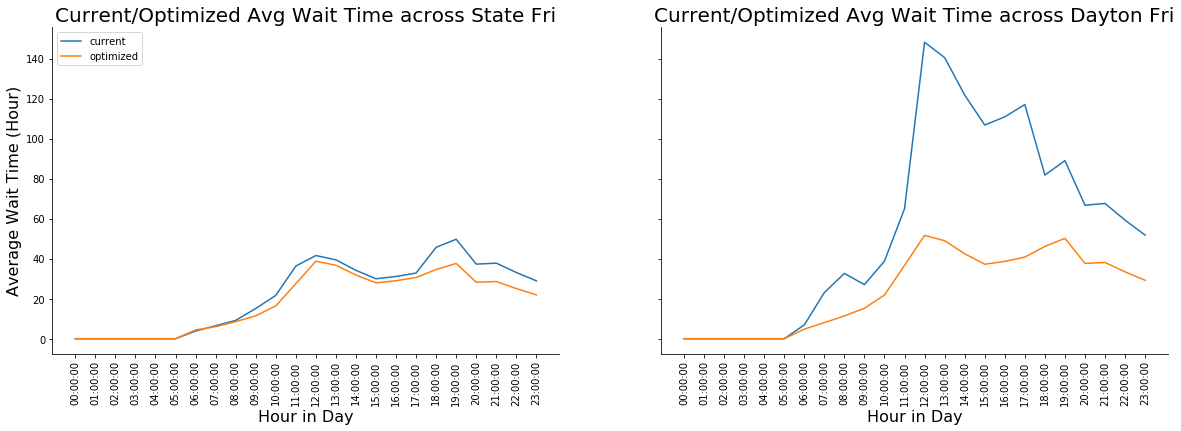

In [122]:
plot_wt_overlay(dayton_wait_fri, opt_dayton_wait_fri,
              "Current/Optimized Avg Wait Time across State Fri", "Current/Optimized Avg Wait Time across Dayton Fri")

In [123]:
def calc_saveWT(df, opt):
    opt["save_hour"] = (df["total_wt_main_hour"] + df["total_wt_cross_hour"]) \
                                  - (opt["total_wt_main_hour"] + opt["total_wt_main_hour"]) 
    opt["save_pct"] = opt["save_hour"] / (df["total_wt_main_hour"] + df["total_wt_cross_hour"])*100
#     opt["save_hour"] = opt["save_hour"].fillna(0)
#     opt["save_pct"] = opt["save_pct"].fillna(0)
    return opt

In [124]:
opt_dayton_wait_wkd = calc_saveWT(dayton_wait_wkd, opt_dayton_wait_wkd)

In [125]:
opt_dayton_wait_fri = calc_saveWT(dayton_wait_fri, opt_dayton_wait_fri)

In [126]:
opt_dayton_wait_sat = dayton_wait_sat.copy()

opt_dayton_wait_sat = fill_pat10(opt_dayton_wait_sat, 7, 24)
opt_dayton_wait_sat = opt_wait_process(opt_dayton_wait_sat)

In [127]:
dayton_wait_sat['total_wt_main_hour'] = dayton_wait_sat.total_wait_main/3600
dayton_wait_sat['total_wt_cross_hour'] = dayton_wait_sat.total_wait_cross/3600

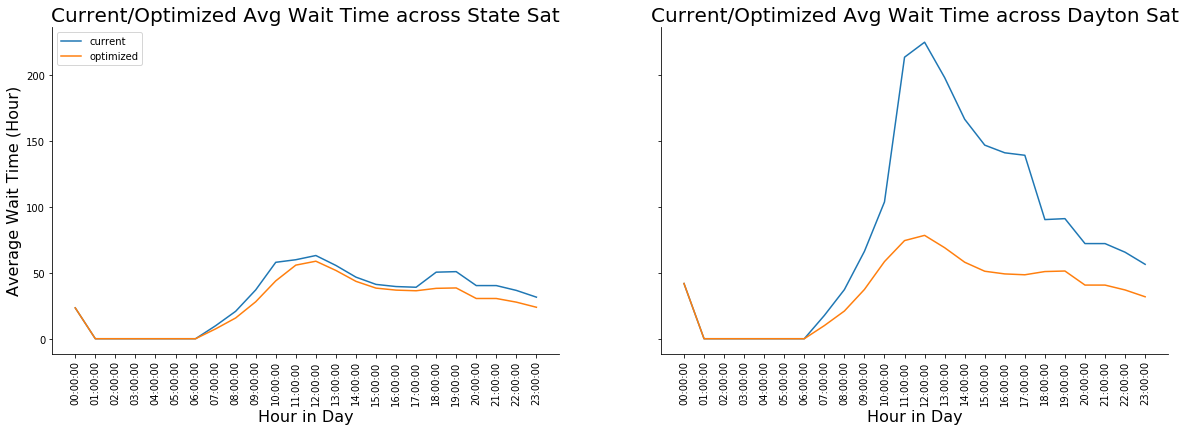

In [128]:
plot_wt_overlay(dayton_wait_sat, opt_dayton_wait_sat,
              "Current/Optimized Avg Wait Time across State Sat", "Current/Optimized Avg Wait Time across Dayton Sat")

In [129]:
opt_dayton_wait_sat = calc_saveWT(dayton_wait_sat, opt_dayton_wait_sat)

In [130]:
def fill_pat1(df, start, end):
    for it in range(start, end, 1):
        df['Total Cycle Time (s)'][it] = 65
        df['Main Street Total Cycle Time (s)'][it] = 35
        df['Main Street Red (s)'][it] = 31.5
        df['Main Street Green (s)'][it] = 30.5
        df['Cross Street Total Cycle Time (s)'][it] = 30
        df['Cross Street Red (s)'][it] = 32
        df['Cross Street Green (s)'][it] = 25.5
    return df

In [131]:
opt_dayton_wait_sun = dayton_wait_sun.copy()

opt_dayton_wait_sun = fill_pat10(opt_dayton_wait_sun, 0, 3)
opt_dayton_wait_sun = fill_pat1(opt_dayton_wait_sun, 3, 7)
opt_dayton_wait_sun = fill_pat11(opt_dayton_wait_sun, 7, 8)
opt_dayton_wait_sun = fill_pat10(opt_dayton_wait_sun, 8, 24)

In [132]:
opt_dayton_wait_sun = opt_wait_process(opt_dayton_wait_sun)
dayton_wait_sun['total_wt_main_hour'] = dayton_wait_sun.total_wait_main/3600
dayton_wait_sun['total_wt_cross_hour'] = dayton_wait_sun.total_wait_cross/3600

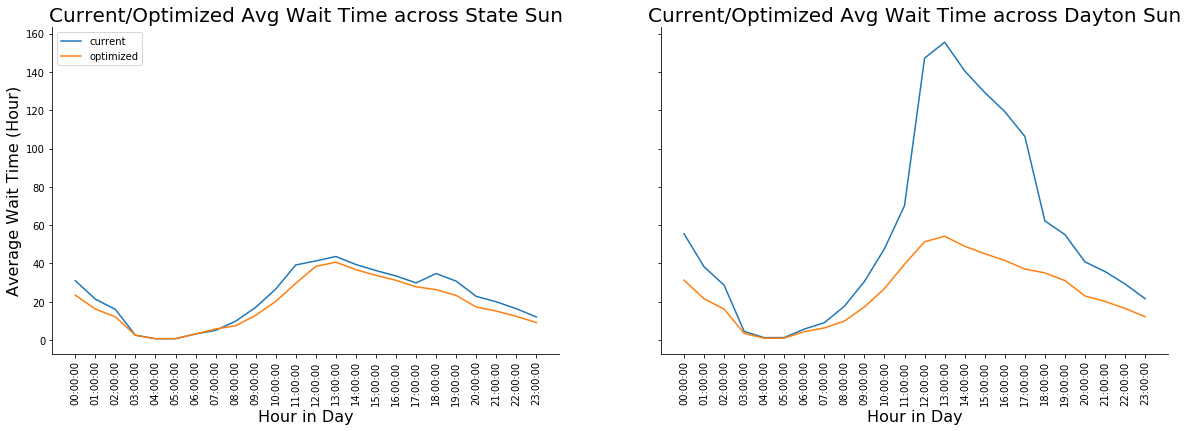

In [133]:
plot_wt_overlay(dayton_wait_sun, opt_dayton_wait_sun,
              "Current/Optimized Avg Wait Time across State Sun", "Current/Optimized Avg Wait Time across Dayton Sun")

In [134]:
opt_dayton_wait_sun = calc_saveWT(dayton_wait_sun, opt_dayton_wait_sun)

### gorham

In [135]:
opt_gorham_wait_wkd = gorham_wait_wkd.copy()

opt_gorham_wait_wkd = fill_pat10(opt_gorham_wait_wkd, 0, 3)
opt_gorham_wait_wkd = fill_pat10(opt_gorham_wait_wkd, 5, 24)
opt_gorham_wait_wkd = opt_wait_process(opt_gorham_wait_wkd)

In [136]:
gorham_wait_wkd['total_wt_main_hour'] = gorham_wait_wkd.total_wait_main/3600
gorham_wait_wkd['total_wt_cross_hour'] = gorham_wait_wkd.total_wait_cross/3600

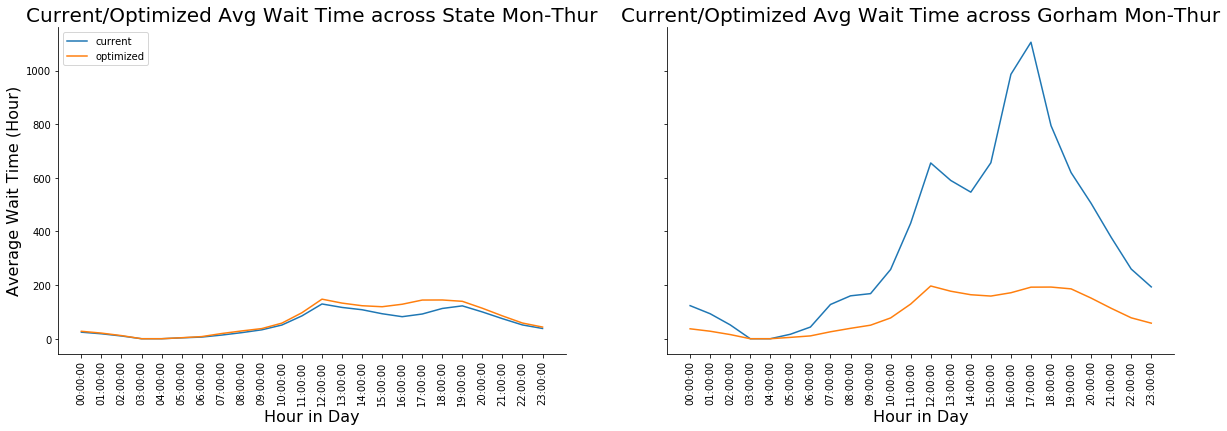

In [137]:
plot_wt_overlay(gorham_wait_wkd, opt_gorham_wait_wkd,
              "Current/Optimized Avg Wait Time across State Mon-Thur", "Current/Optimized Avg Wait Time across Gorham Mon-Thur")

In [138]:
opt_gorham_wait_wkd = calc_saveWT(gorham_wait_wkd, opt_gorham_wait_wkd)

In [139]:
def fill_pat13(df, start, end):
    for it in range(start, end, 1):
        df['Total Cycle Time (s)'][it] = 69
        df['Main Street Total Cycle Time (s)'][it] = 44.5
        df['Main Street Red (s)'][it] = 26
        df['Main Street Green (s)'][it] = 40
        df['Cross Street Total Cycle Time (s)'][it] = 24.5
        df['Cross Street Red (s)'][it] = 46
        df['Cross Street Green (s)'][it] = 20
    return df

In [140]:
def fill_pat15(df, start, end):
    for it in range(start, end, 1):
        df['Total Cycle Time (s)'][it] = 74
        df['Main Street Total Cycle Time (s)'][it] = 45.5
        df['Main Street Red (s)'][it] = 31.5
        df['Main Street Green (s)'][it] = 41
        df['Cross Street Total Cycle Time (s)'][it] = 30
        df['Cross Street Red (s)'][it] = 47
        df['Cross Street Green (s)'][it] = 24
    return df

In [141]:
def fill_pat16(df, start, end):
    for it in range(start, end, 1):
        df['Total Cycle Time (s)'][it] = 61
        df['Main Street Total Cycle Time (s)'][it] = 30.5
        df['Main Street Red (s)'][it] = 31.5
        df['Main Street Green (s)'][it] = 26
        df['Cross Street Total Cycle Time (s)'][it] = 30.5
        df['Cross Street Red (s)'][it] = 31.5
        df['Cross Street Green (s)'][it] = 26
    return df

In [142]:
def fill_pat17(df, start, end):
    for it in range(start, end, 1):
        df['Total Cycle Time (s)'][it] = 51
        df['Main Street Total Cycle Time (s)'][it] = 20
        df['Main Street Red (s)'][it] = 32.5
        df['Main Street Green (s)'][it] = 15.5
        df['Cross Street Total Cycle Time (s)'][it] = 31
        df['Cross Street Red (s)'][it] = 21.5
        df['Cross Street Green (s)'][it] = 26.5
    return df

In [143]:
def fill_pat18(df, start, end):
    for it in range(start, end, 1):
        df['Total Cycle Time (s)'][it] = 48.5
        df['Main Street Total Cycle Time (s)'][it] = 20
        df['Main Street Red (s)'][it] = 29.5
        df['Main Street Green (s)'][it] = 15.5
        df['Cross Street Total Cycle Time (s)'][it] = 28.5
        df['Cross Street Red (s)'][it] = 21.5
        df['Cross Street Green (s)'][it] = 24
    return df

In [144]:
opt_gorham_wait_fri = gorham_wait_fri.copy()

opt_gorham_wait_fri = fill_pat10(opt_gorham_wait_fri, 0, 3)
opt_gorham_wait_fri = fill_pat15(opt_gorham_wait_fri, 5, 6)
opt_gorham_wait_fri = fill_pat16(opt_gorham_wait_fri, 6, 7)
opt_gorham_wait_fri = fill_pat10(opt_gorham_wait_fri, 7, 24)
opt_gorham_wait_fri = opt_wait_process(opt_gorham_wait_fri)

In [145]:
gorham_wait_fri['total_wt_main_hour'] = gorham_wait_fri.total_wait_main/3600
gorham_wait_fri['total_wt_cross_hour'] = gorham_wait_fri.total_wait_cross/3600

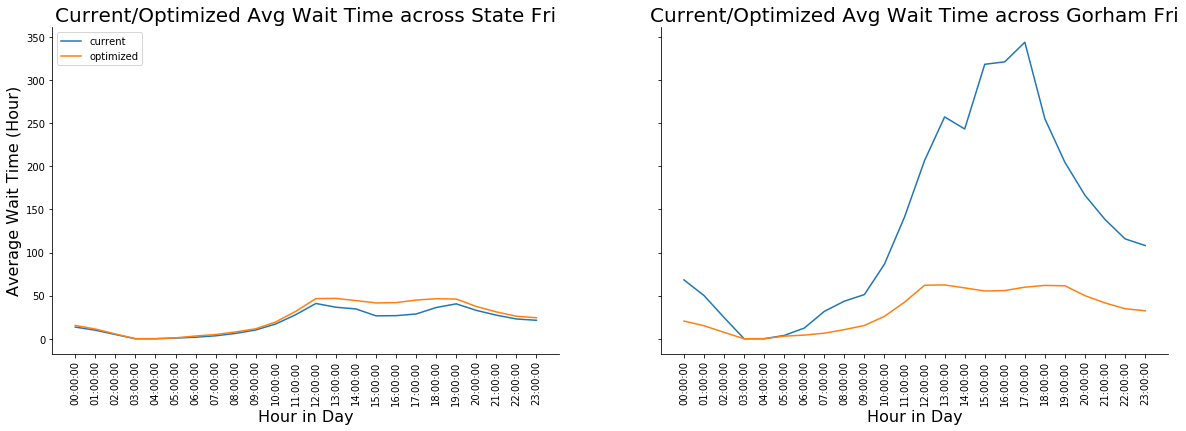

In [146]:
plot_wt_overlay(gorham_wait_fri, opt_gorham_wait_fri,
              "Current/Optimized Avg Wait Time across State Fri", "Current/Optimized Avg Wait Time across Gorham Fri")

In [147]:
opt_gorham_wait_fri = calc_saveWT(gorham_wait_fri, opt_gorham_wait_fri)

In [148]:
opt_gorham_wait_sat = gorham_wait_sat.copy()

opt_gorham_wait_sat = fill_pat10(opt_gorham_wait_sat, 0, 3)
opt_gorham_wait_sat = fill_pat16(opt_gorham_wait_sat, 6, 7)
opt_gorham_wait_sat = fill_pat10(opt_gorham_wait_sat, 7, 24)
opt_gorham_wait_sat = opt_wait_process(opt_gorham_wait_sat)

In [149]:
gorham_wait_sat['total_wt_main_hour'] = gorham_wait_sat.total_wait_main/3600
gorham_wait_sat['total_wt_cross_hour'] = gorham_wait_sat.total_wait_cross/3600

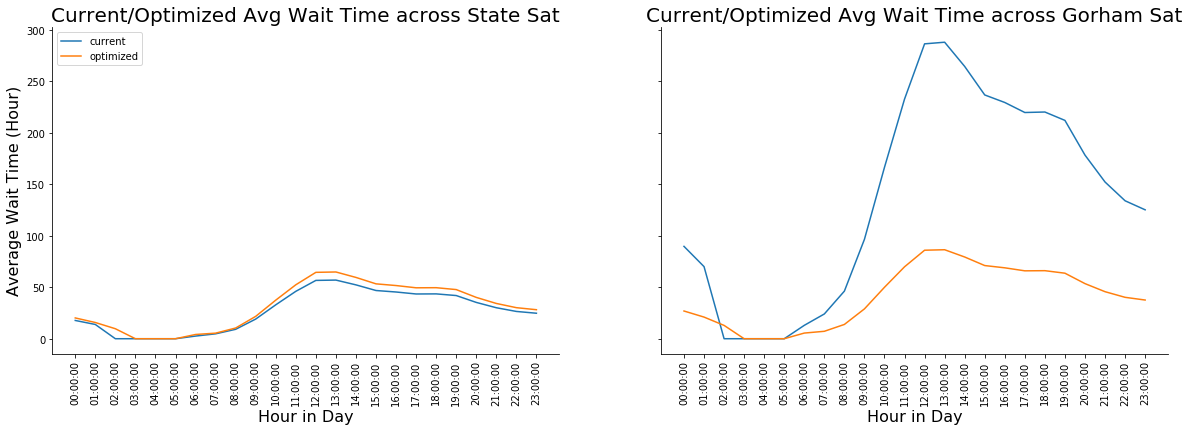

In [150]:
plot_wt_overlay(gorham_wait_sat, opt_gorham_wait_sat,
              "Current/Optimized Avg Wait Time across State Sat", "Current/Optimized Avg Wait Time across Gorham Sat")

In [151]:
opt_gorham_wait_sat = calc_saveWT(gorham_wait_sat, opt_gorham_wait_sat)

In [152]:
opt_gorham_wait_sun = gorham_wait_sun.copy()

opt_gorham_wait_sun = fill_pat10(opt_gorham_wait_sun, 0, 3)
opt_gorham_wait_sun = fill_pat17(opt_gorham_wait_sun, 7, 8)
opt_gorham_wait_sun = fill_pat10(opt_gorham_wait_sun, 8, 24)
opt_gorham_wait_sun = opt_wait_process(opt_gorham_wait_sun)

In [153]:
gorham_wait_sun['total_wt_main_hour'] = gorham_wait_sun.total_wait_main/3600
gorham_wait_sun['total_wt_cross_hour'] = gorham_wait_sun.total_wait_cross/3600

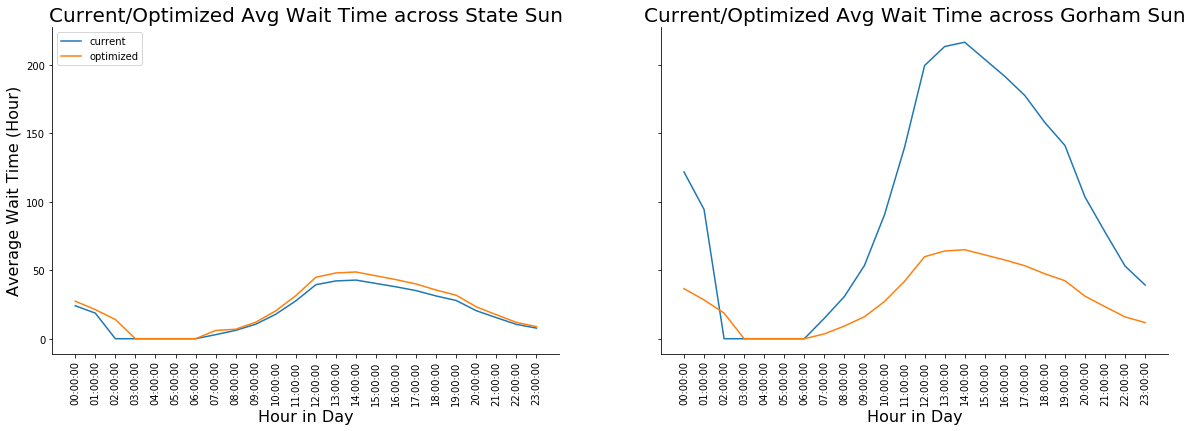

In [154]:
plot_wt_overlay(gorham_wait_sun, opt_gorham_wait_sun,
              "Current/Optimized Avg Wait Time across State Sun", "Current/Optimized Avg Wait Time across Gorham Sun")

In [155]:
opt_gorham_wait_sun = calc_saveWT(gorham_wait_sun, opt_gorham_wait_sun)

### johnson

In [156]:
opt_johnson_wait_wkd = johnson_wait_wkd.copy()

opt_johnson_wait_wkd = fill_pat10(opt_johnson_wait_wkd, 0, 3)
opt_johnson_wait_wkd = fill_pat18(opt_johnson_wait_wkd, 5, 6)
opt_johnson_wait_wkd = fill_pat10(opt_johnson_wait_wkd, 6, 24)
opt_johnson_wait_wkd = opt_wait_process(opt_johnson_wait_wkd)

In [157]:
johnson_wait_wkd['total_wt_main_hour'] = johnson_wait_wkd.total_wait_main/3600
johnson_wait_wkd['total_wt_cross_hour'] = johnson_wait_wkd.total_wait_cross/3600

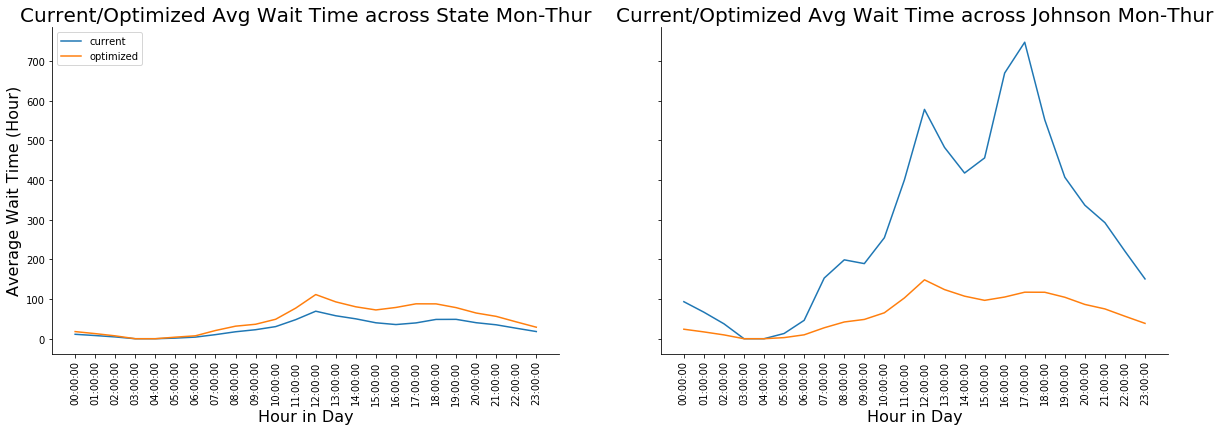

In [158]:
plot_wt_overlay(johnson_wait_wkd, opt_johnson_wait_wkd,
              "Current/Optimized Avg Wait Time across State Mon-Thur", "Current/Optimized Avg Wait Time across Johnson Mon-Thur")

In [159]:
opt_johnson_wait_wkd = calc_saveWT(johnson_wait_wkd, opt_johnson_wait_wkd)

In [160]:
opt_johnson_wait_fri = johnson_wait_fri.copy()

opt_johnson_wait_fri = fill_pat10(opt_johnson_wait_fri, 0, 3)
opt_johnson_wait_fri = fill_pat13(opt_johnson_wait_fri, 5, 6)
opt_johnson_wait_fri = fill_pat18(opt_johnson_wait_fri, 6, 7)
opt_johnson_wait_fri = fill_pat10(opt_johnson_wait_fri, 7, 24)
opt_johnson_wait_fri = opt_wait_process(opt_johnson_wait_fri)

In [161]:
johnson_wait_fri['total_wt_main_hour'] = johnson_wait_fri.total_wait_main/3600
johnson_wait_fri['total_wt_cross_hour'] = johnson_wait_fri.total_wait_cross/3600

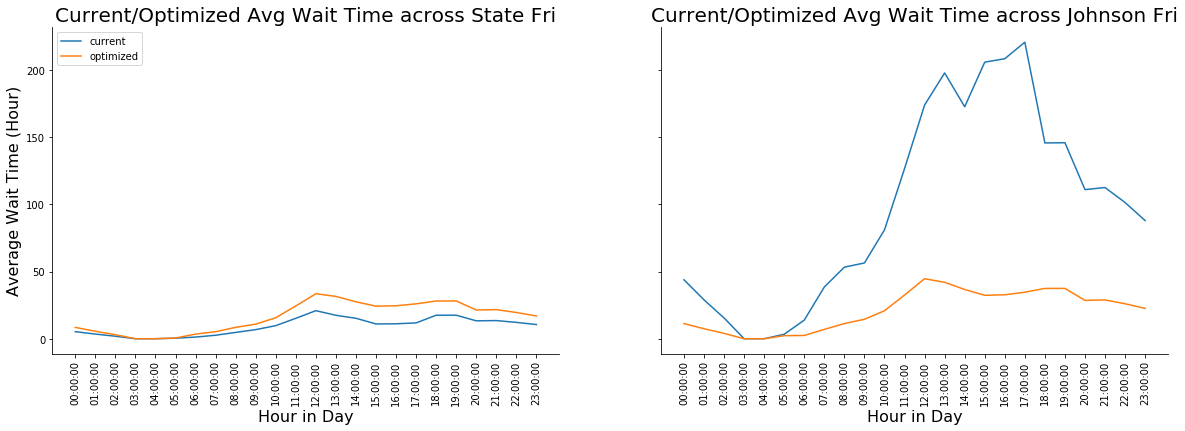

In [162]:
plot_wt_overlay(johnson_wait_fri, opt_johnson_wait_fri,
              "Current/Optimized Avg Wait Time across State Fri", "Current/Optimized Avg Wait Time across Johnson Fri")

In [163]:
opt_johnson_wait_fri = calc_saveWT(johnson_wait_fri, opt_johnson_wait_fri)

In [164]:
opt_johnson_wait_sat = johnson_wait_sat.copy()

opt_johnson_wait_sat = fill_pat10(opt_johnson_wait_sat, 0, 3)
opt_johnson_wait_sat = fill_pat18(opt_johnson_wait_sat, 6, 7)
opt_johnson_wait_sat = fill_pat10(opt_johnson_wait_sat, 7, 24)
opt_johnson_wait_sat = opt_wait_process(opt_johnson_wait_sat)

In [165]:
johnson_wait_sat['total_wt_main_hour'] = johnson_wait_sat.total_wait_main/3600
johnson_wait_sat['total_wt_cross_hour'] = johnson_wait_sat.total_wait_cross/3600

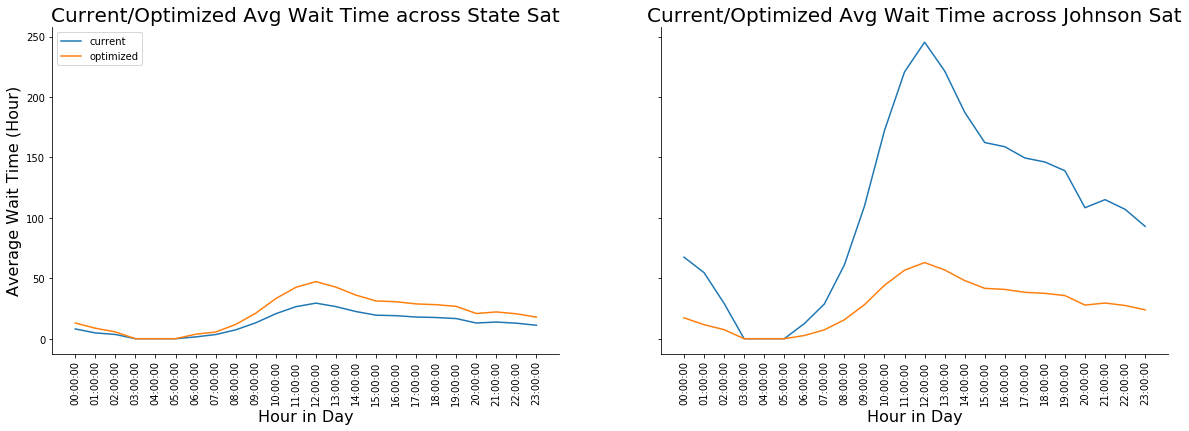

In [166]:
plot_wt_overlay(johnson_wait_sat, opt_johnson_wait_sat,
              "Current/Optimized Avg Wait Time across State Sat", "Current/Optimized Avg Wait Time across Johnson Sat")

In [167]:
opt_johnson_wait_sat = calc_saveWT(johnson_wait_sat, opt_johnson_wait_sat)

In [168]:
opt_johnson_wait_sun = johnson_wait_sun.copy()

opt_johnson_wait_sun = fill_pat10(opt_johnson_wait_sun, 0, 3)
opt_johnson_wait_sun = fill_pat18(opt_johnson_wait_sun, 7, 8)
opt_johnson_wait_sun = fill_pat10(opt_johnson_wait_sun, 8, 24)
opt_johnson_wait_sun = opt_wait_process(opt_johnson_wait_sun)

In [169]:
johnson_wait_sun['total_wt_main_hour'] = johnson_wait_sun.total_wait_main/3600
johnson_wait_sun['total_wt_cross_hour'] = johnson_wait_sun.total_wait_cross/3600

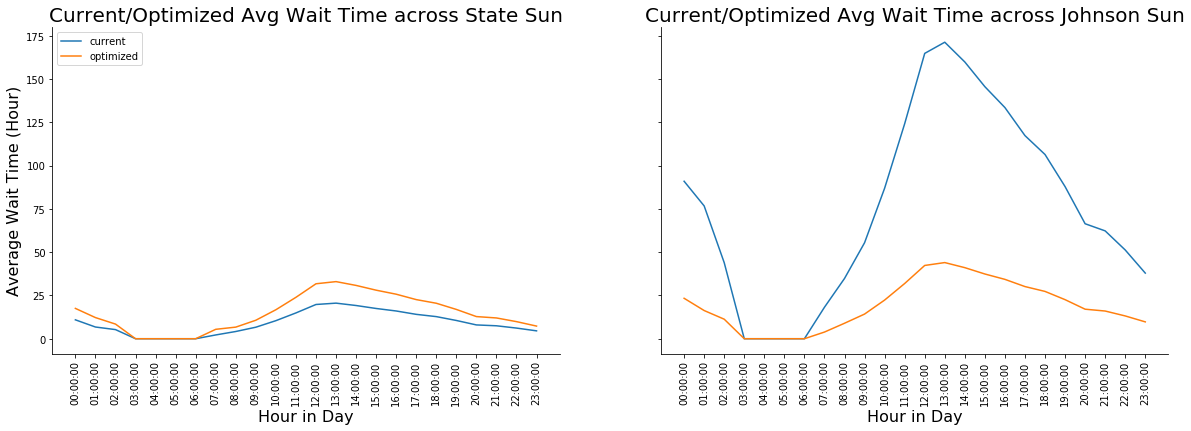

In [170]:
plot_wt_overlay(johnson_wait_sun, opt_johnson_wait_sun,
              "Current/Optimized Avg Wait Time across State Sun", "Current/Optimized Avg Wait Time across Johnson Sun")

In [171]:
opt_johnson_wait_sun = calc_saveWT(johnson_wait_sun, opt_johnson_wait_sun)

### Summary

In [172]:
sum_dayton = pd.DataFrame(columns=['save_hour', 'save_pct'])
dayton_ = [opt_dayton_wait_wkd, opt_dayton_wait_fri, opt_dayton_wait_sat, opt_dayton_wait_sun]
for i in range(4):
    df = dayton_[i]
    hour = df["save_hour"].sum()
    x = df[df["save_pct"] != 0]
    pct = x["save_pct"].mean()
    sum_dayton = sum_dayton.append({'save_hour': hour, 'save_pct': pct}, ignore_index=True)

In [173]:
sum_dayton

,save_hour,save_pct
0,2597.503025,49.468616
1,998.635588,50.181022
2,1430.989329,49.993629
3,993.349162,45.047875


In [174]:
opt_dayton_wait_wkd['save_hour']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6      16.341387
7      68.639202
8      93.612360
9      62.945024
10     88.247713
11    147.479966
12    215.417020
13    177.026286
14    152.346992
15    243.398277
16    266.308715
17    301.522906
18    182.618982
19    175.808718
20    143.286662
21    116.688481
22     87.147032
23     58.667302
Name: save_hour, dtype: float64

In [175]:
opt_dayton_wait_wkd['save_hour'].sum()

2597.5030254540598

In [176]:
opt_gorham_wait_sat['save_pct'] = opt_gorham_wait_sat['save_pct'].replace(to_replace = -np.inf, value = 0)
opt_gorham_wait_sat['save_pct']

0     62.412969
1     62.412969
2      0.000000
3           NaN
4           NaN
5           NaN
6     47.093094
7     62.412969
8     62.412969
9     62.412969
10    62.412969
11    62.412969
12    62.412969
13    62.412969
14    62.412969
15    62.412969
16    62.412969
17    62.412969
18    62.412969
19    62.412969
20    62.412969
21    62.412969
22    62.412969
23    62.412969
Name: save_pct, dtype: float64

In [177]:
opt_gorham_wait_sun['save_pct'] = opt_gorham_wait_sun['save_pct'].replace(to_replace = -np.inf, value = 0)

In [178]:
sum_gorham = pd.DataFrame(columns=['save_hour', 'save_pct'])
gorham_ = [opt_gorham_wait_wkd, opt_gorham_wait_fri, opt_gorham_wait_sat, opt_gorham_wait_sun]
for i in range(4):
    df = gorham_[i]
    hour = df["save_hour"].sum()
    x = df[df["save_pct"] != 0]
    x.replace(to_replace = -np.inf, value = 0)
    pct = x["save_pct"].mean()
    sum_gorham = sum_gorham.append({'save_hour': hour, 'save_pct': pct}, ignore_index=True)
sum_gorham

,save_hour,save_pct
0,6767.645838,65.145325
1,2486.048523,65.156720
2,2433.634961,61.646976
3,1701.019551,60.845844


In [179]:
sum_johnson = pd.DataFrame(columns=['save_hour', 'save_pct'])
johnson_ = [opt_johnson_wait_wkd, opt_johnson_wait_fri, opt_johnson_wait_sat, opt_johnson_wait_sun]
for i in range(4):
    df = johnson_[i]
    hour = df["save_hour"].sum()
    x = df[df["save_pct"] != 0]
    x.replace(to_replace = -np.inf, value = 0)
    pct = x["save_pct"].mean()
    sum_johnson = sum_johnson.append({'save_hour': hour, 'save_pct': pct}, ignore_index=True)
sum_johnson

,save_hour,save_pct
0,5139.319478,67.180960
1,1791.417955,68.095432
2,1902.943662,64.945706
3,1347.448544,64.912672


In [180]:
sum_dayton_t = sum_dayton.transpose()
sum_dayton_t.columns = ['Weekday', 'Firday', 'Saturday', 'Sunday']
sum_dayton_t

,Weekday,Firday,Saturday,Sunday
save_hour,2597.503025,998.635588,1430.989329,993.349162
save_pct,49.468616,50.181022,49.993629,45.047875


In [181]:
sum_dayton_t.loc['save_hour']

Weekday     2597.503025
Firday       998.635588
Saturday    1430.989329
Sunday       993.349162
Name: save_hour, dtype: float64

In [182]:
def trans_df(df):
    df_ = df.transpose()
    df_.columns = ['Weekday', 'Firday', 'Saturday', 'Sunday']
    return df_

In [183]:
sum_gorham_t = trans_df(sum_gorham)
sum_johnson_t = trans_df(sum_johnson)

In [184]:
sum_gorham_t

,Weekday,Firday,Saturday,Sunday
save_hour,6767.645838,2486.048523,2433.634961,1701.019551
save_pct,65.145325,65.156720,61.646976,60.845844


In [185]:
df = pd.concat([sum_dayton_t, sum_gorham_t, sum_johnson_t])
df

,Weekday,Firday,Saturday,Sunday
save_hour,2597.503025,998.635588,1430.989329,993.349162
save_pct,49.468616,50.181022,49.993629,45.047875
save_hour,6767.645838,2486.048523,2433.634961,1701.019551
save_pct,65.145325,65.156720,61.646976,60.845844
save_hour,5139.319478,1791.417955,1902.943662,1347.448544
save_pct,67.180960,68.095432,64.945706,64.912672


In [186]:
df_hour = df.loc['save_hour']
df_hour

,Weekday,Firday,Saturday,Sunday
save_hour,2597.503025,998.635588,1430.989329,993.349162
save_hour,6767.645838,2486.048523,2433.634961,1701.019551
save_hour,5139.319478,1791.417955,1902.943662,1347.448544


In [187]:
street_hr = df_hour.transpose()
street_hr.columns = ['Dayton', 'Gorham', 'Johnson']
street_hr

,Dayton,Gorham,Johnson
Weekday,2597.503025,6767.645838,5139.319478
Firday,998.635588,2486.048523,1791.417955
Saturday,1430.989329,2433.634961,1902.943662
Sunday,993.349162,1701.019551,1347.448544


In [188]:
df_pct = df.loc['save_pct']
df_pct

,Weekday,Firday,Saturday,Sunday
save_pct,49.468616,50.181022,49.993629,45.047875
save_pct,65.145325,65.156720,61.646976,60.845844
save_pct,67.180960,68.095432,64.945706,64.912672


In [189]:
street_pct = df_pct.transpose()
street_pct.columns = ['Dayton', 'Gorham', 'Johnson']
street_pct

,Dayton,Gorham,Johnson
Weekday,49.468616,65.145325,67.180960
Firday,50.181022,65.156720,68.095432
Saturday,49.993629,61.646976,64.945706
Sunday,45.047875,60.845844,64.912672


In [190]:
idx = list(street_pct.index)
idx

['Weekday', 'Firday', 'Saturday', 'Sunday']

In [191]:
# credit to https://tyler.caraza-harter.com/cs301/spring19/materials/code/lec-39/axes.html
# return list of two axes objects
def plot_pair(n):
    t = plt.subplots(ncols=2, figsize=(14,6))
    plt.subplots_adjust(wspace=0.5)
    t[0].suptitle("Total Saving Hour v.s. Percentage", fontsize=24)
    return list(t[1])

In [192]:
street_hr_ = street_hr/1000
street_hr_

,Dayton,Gorham,Johnson
Weekday,2.597503,6.767646,5.139319
Firday,0.998636,2.486049,1.791418
Saturday,1.430989,2.433635,1.902944
Sunday,0.993349,1.701020,1.347449


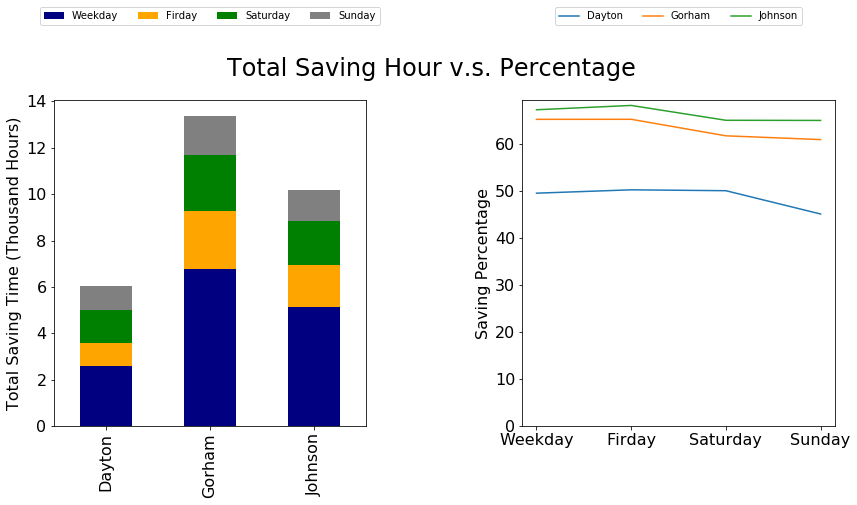

In [193]:
ax = plot_pair(1)

# plot 1
street_hr_.transpose().plot.bar(ax=ax[0], color=["navy", "orange", "green", "gray"], stacked=True)
ax[0].set_ylabel("Total Saving Time (Thousand Hours)", fontsize=16)
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=4)
ax[0].tick_params(axis='both', which='major', labelsize=16)

street_pct.plot.line(ax=ax[1])
ax[1].set_xticks(range(len(idx)))
ax[1].set_xticklabels(idx)
ax[1].set_ylim(0)
ax[1].set_ylabel("Saving Percentage", fontsize=16)
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=4)
ax[1].tick_params(axis='both', which='major', labelsize=16)

None

In [194]:
def sum_wait(df1=None, df2=None, df3=None, df4=None):
#     df1 = street + "_wait_wkd"
#     df2 = street + "_wait_fri"
#     df3 = street + "_wait_sat"
#     df4 = street + "_wait_sun"
    sum1 = 0
    sum2 = 0
    sum3 = 0
    sum4 = 0
    
    if df1 is not None:
        sum1 = df1['total_wait_main'].sum() + df1['total_wait_cross'].sum()
    if df2 is not None:
        sum2 = df2['total_wait_main'].sum() + df2['total_wait_cross'].sum()
    if df3 is not None:
        sum3 = df3['total_wait_main'].sum() + df3['total_wait_cross'].sum()
    if df4 is not None:
        sum4 = df4['total_wait_main'].sum() + df4['total_wait_cross'].sum()
    
    return sum1+sum2+sum3+sum4

In [195]:
dt_wait = sum_wait(dayton_wait_wkd, dayton_wait_fri, dayton_wait_sat, dayton_wait_sun)
dt_wait

41987059.90959135

In [196]:
js_wait = sum_wait(johnson_wait_wkd, johnson_wait_fri, johnson_wait_sat, johnson_wait_sun)
js_wait

53841447.31345454

In [197]:
gh_wait = sum_wait(gorham_wait_wkd, gorham_wait_fri, gorham_wait_sat, gorham_wait_sun)
gh_wait

73921527.18720517

In [198]:
opt_dt_wait = sum_wait(opt_dayton_wait_wkd, opt_dayton_wait_fri, opt_dayton_wait_sat, opt_dayton_wait_sun)
opt_js_wait = sum_wait(opt_johnson_wait_wkd, opt_johnson_wait_fri, opt_johnson_wait_sat, opt_johnson_wait_sun)
opt_gh_wait = sum_wait(opt_gorham_wait_wkd, opt_gorham_wait_fri, opt_gorham_wait_sat, opt_gorham_wait_sun)
opt_dt_wait, opt_js_wait, opt_gh_wait

(23729650.17860577, 20022607.242409516, 30000334.275493953)

In [199]:
opt_wkd = sum_wait(opt_dayton_wait_wkd, opt_johnson_wait_wkd, opt_gorham_wait_wkd)
opt_fri = sum_wait(opt_dayton_wait_fri, opt_johnson_wait_fri, opt_gorham_wait_fri)
opt_sat = sum_wait(opt_dayton_wait_sat, opt_johnson_wait_sat, opt_gorham_wait_sat)
opt_sun = sum_wait(opt_dayton_wait_sun, opt_johnson_wait_sun, opt_gorham_wait_sun)

wkd = sum_wait(dayton_wait_wkd, johnson_wait_wkd, gorham_wait_wkd)
fri = sum_wait(dayton_wait_fri, johnson_wait_fri, gorham_wait_fri)
sat = sum_wait(dayton_wait_sat, johnson_wait_sat, gorham_wait_sat)
sun = sum_wait(dayton_wait_sun, johnson_wait_sun, gorham_wait_sun)

In [200]:
wkd_wt = pd.Series([wkd, opt_wkd], index=['current', 'optimized'], name='Weekday')
fri_wt = pd.Series([fri, opt_fri], index=['current', 'optimized'], name='Friday')
sat_wt = pd.Series([sat, opt_sat], index=['current', 'optimized'], name='Saturday')
sun_wt = pd.Series([sun, opt_sun], index=['current', 'optimized'], name='Sunday')
dayWeek_wt = pd.DataFrame([wkd_wt, fri_wt, sat_wt, sun_wt])

In [201]:
dayWeek_wt /= (3600*1000)

In [202]:
current_wt = pd.Series([dt_wait, js_wait, gh_wait], index=['Dayton', 'Johnson', 'Gorham'], name='current')
opt_wt = pd.Series([opt_dt_wait, opt_js_wait, opt_gh_wait], index=['Dayton', 'Johnson', 'Gorham'], name='optimized')
cur_opt_wt = pd.DataFrame([current_wt, opt_wt])

In [203]:
dt_wt = pd.Series([dt_wait, opt_dt_wait], index=['current', 'optimized'], name='Dayton')
js_wt = pd.Series([js_wait, opt_js_wait], index=['current', 'optimized'], name='Johnson')
gh_wt = pd.Series([gh_wait, opt_gh_wait], index=['current', 'optimized'], name='Gorham')
cur_opt_wt = pd.DataFrame([dt_wt, js_wt, gh_wt])

In [204]:
cur_opt_wt = cur_opt_wt/3600  # convert to hour

In [205]:
cur_opt_wt_ = cur_opt_wt/1000

In [206]:
cur_opt_wt_

,current,optimized
Dayton,11.663072,6.591569
Johnson,14.955958,5.561835
Gorham,20.533758,8.333426


In [207]:
dayWeek_wt

,current,optimized
Weekday,22.786419,9.659812
Friday,8.121770,3.319918
Saturday,9.524799,4.391799
Sunday,6.719799,3.115302


In [208]:
def plot_pair2(n, title, xlab="", ylab=""):
    t = plt.subplots(ncols=2, figsize=(14,6),sharey=True)
    plt.subplots_adjust(wspace=0.5)
    t[0].suptitle(title, fontsize=24)

    return list(t[1])

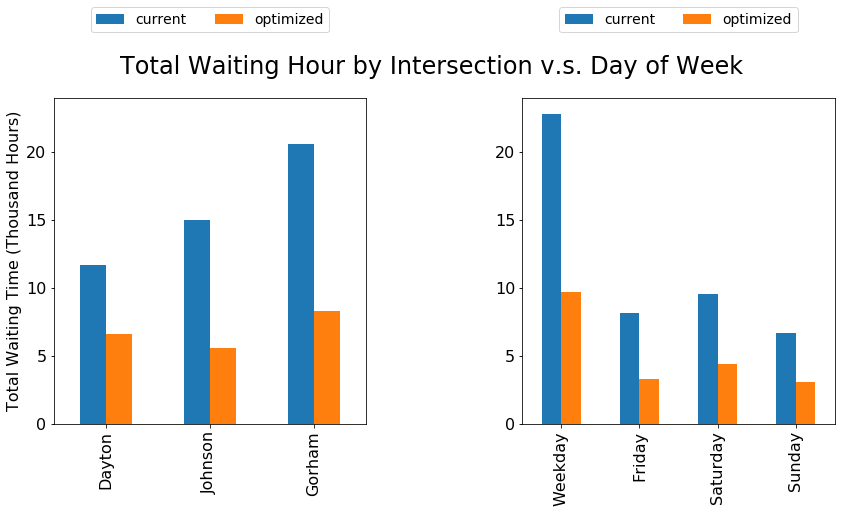

In [209]:
ax = plot_pair2(2, "Total Waiting Hour by Intersection v.s. Day of Week")

# plot 1
cur_opt_wt_.plot.bar(ax=ax[0])
ax[0].set_ylabel("Total Waiting Time (Thousand Hours)", fontsize=16)
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2, fontsize=14)
ax[0].tick_params(axis='both', which='major', labelsize=16)

# plot 2
dayWeek_wt.plot.bar(ax=ax[1])
ax[1].set_ylabel("Total Waiting Time (Thousand Hours)", fontsize=16)
ax[1].yaxis.set_tick_params(labelleft=True)  # used to show both y axis label
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2, fontsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=16)

None

1. trade-off exists in optimization. People who want to go across the State Street may have to wait longer on average. However, the overall happiness is maximized. (The total anger index is minimized). 
2. Time saving reaches around 50% on average. (Saving Percentage does not take yellow flashing time into consideration). 

## visualize the optimized pattern

In [210]:
dayton_traffic = pd.read_excel('dayton_traffic.xlsx', sheet_name='Dayton')
dayton_traffic.head()

,Direction1,Direction2
00:00:00,12,40
01:00:00,14,29
02:00:00,3,22
03:00:00,5,16
04:00:00,3,22


In [211]:
dayton_traffic['Sum'] = dayton_traffic.Direction1 + dayton_traffic.Direction2
dayton_traffic.head()

,Direction1,Direction2,Sum
00:00:00,12,40,52
01:00:00,14,29,43
02:00:00,3,22,25
03:00:00,5,16,21
04:00:00,3,22,25


In [212]:
state_traffic = pd.read_excel('dayton_traffic.xlsx', sheet_name='State')
state_traffic['Sum'] = state_traffic.Direction1 + state_traffic.Direction2

In [213]:
dayton_traffic.Sum.sum()

8676

In [214]:
state_traffic.Sum.sum()

2494

In [215]:
opt_programs['Pattern'] = opt_programs['Pattern'].replace('Flash', 0)
opt_programs['Pattern'].astype('int64')
opt_combined = pd.merge(opt_programs, opt_patterns, on=['Intersection', 'Pattern'], how="left")
Dayton_opt = opt_combined[opt_combined['Intersection'] == 'State and Dayton']
Gorham_opt = opt_combined[opt_combined['Intersection'] == 'State and Gorham']
Johnson_opt = opt_combined[opt_combined['Intersection'] == 'State and Johnson']

Dayton_wkd_opt = Dayton_opt[Dayton_opt['Day Type'] == 'Monday - Thursday']
Dayton_fri_opt = Dayton_opt[Dayton_opt['Day Type'] == 'Friday']
Dayton_sat_opt = Dayton_opt[Dayton_opt['Day Type'] == 'Saturday']
Dayton_sun_opt = Dayton_opt[Dayton_opt['Day Type'] == 'Sunday']

Gorham_wkd_opt = Gorham_opt[Gorham_opt['Day Type'] == 'Monday - Thursday']
Gorham_fri_opt = Gorham_opt[Gorham_opt['Day Type'] == 'Friday']
Gorham_sat_opt = Gorham_opt[Gorham_opt['Day Type'] == 'Saturday']
Gorham_sun_opt = Gorham_opt[Gorham_opt['Day Type'] == 'Sunday']

Johnson_wkd_opt = Johnson_opt[Johnson_opt['Day Type'] == 'Monday - Thursday']
Johnson_fri_opt = Johnson_opt[Johnson_opt['Day Type'] == 'Friday']
Johnson_sat_opt = Johnson_opt[Johnson_opt['Day Type'] == 'Saturday']
Johnson_sun_opt = Johnson_opt[Johnson_opt['Day Type'] == 'Sunday']

In [216]:
# If the number of seconds elapsed is divisible by 1800 (30 minutes), that number will be used as one of the ticks.
# xticks = [x for x in range(60 * 60 * 24 + 30) if x % 1800 == 0]
xticks = [x for x in range(60 * 60 * 24 + 30) if x % 3600 == 0]
xticklabels = [str(dt.timedelta(seconds=x)) for x in xticks]

In [217]:
def preprocess_ped_lights(ped_, street1, street2, lights_):
    # calculate all pedestrian in the specific street area group by time
    s1 = ped_.groupby(ped_.Hour)[street1].median()
    s2 = ped_.groupby(ped_.Hour)[street2].median()
    ped_total = s1 + s2
    
    # preprocess time 
    modify = lights_['Start Time'].copy()
    modify.reset_index(inplace=True, drop=True)
    modify[len(modify)] =  dt.time(23,59,59)
    
    # Rather than plotting the dt.time() on the x-axis, it could be easier to plot the number of seconds that have elapsed in the day. 
    # Below we use a list comprehension to convert the times into the number of seconds elapsed.
    seconds = [(x.hour * 3600 + x.minute * 60 + x.second) for x in modify]
    main = pd.concat([pd.Series([lights_['Main Street Green (s)'].iloc[-1]]), lights_['Main Street Green (s)']])
    cross = pd.concat([pd.Series([lights_['Cross Street Green (s)'].iloc[-1]]), lights_['Cross Street Green (s)']])
    
    return ped_total, seconds, main, cross

In [218]:
# credit to ImportanceOfBeingErnest@overstackflow
# https://stackoverflow.com/questions/43374920/how-to-automatically-annotate-maximum-value-in-pyplot
def annot_max(x,y, ax=None):
    maxIxVal = np.argmax(y);
    zeroBasedIx = np.argwhere(y.index==maxIxVal).flatten()[0];
    xmax = x[zeroBasedIx];
    ymax = y.max()
    text = "x={:s}, count={:.2f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="-",connectionstyle="arc3,rad=0.1")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.98,0.99), **kw)

In [219]:
# bigger arrow
# credit to daronjp@stackoverflow 
# https://stackoverflow.com/questions/58070901/bar-plot-with-24-hours-in-the-x-axis-with-date-time-data-of-only-the-beginning-o
def lights_ped(timeline, main_gree, cross_green, title1, ped_count, title2, 
              street1_lab="Main Street green lights", street2_lab="State Street green lights", 
               arw_x=0.17, arw_y=0.14, flash=True):
    fig, ax = plt.subplots(figsize=(10,5))
    
    bar_start = 0
    for ix, (second, main_green, cross_green) in enumerate(zip(timeline, main_gree, cross_green)):
        width = second - bar_start
        ax.bar(bar_start, main_green, width=width, align='edge', color='springgreen', edgecolor='whitesmoke', 
               label=street1_lab if ix == 0 else "_nolegend_")
        ax.bar(bar_start, cross_green, width=width, bottom=main_green, 
               align='edge', color = 'turquoise', edgecolor='whitesmoke', label=street2_lab if ix == 0 else "_nolegend_")
        bar_start += width

    if flash:
        bbox_props = dict(boxstyle="darrow,pad=0.3",lw=2, facecolor="yellow", ec="black")
        txt = ax.text(arw_x, arw_y, "Yellow Flashing", ha="center", va="center", rotation=0,
            size=12, bbox=bbox_props, transform = ax.transAxes)

    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels, rotation=90)
    ax.set_title(title1, fontsize=20)
    ax.set_xlabel("Hour in Day", fontsize=16)
    ax.set_ylabel("Time for Green (sec)", fontsize=16)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.legend(loc=[1.02, 0.8])
    plt.show()

    fig2 = plt.figure(figsize=(9.5, 5))
    ax2 = fig2.add_subplot(211)
    lines = ax2.plot(ped_count.index, ped_count.values)
    ax2.set_title(title2, fontsize=20)
    ax2.set_xticklabels(ped_count.index, rotation=90)
    ax2.set_xlabel("Hour in Day", fontsize=16)
    ax2.set_ylabel("Pedestrain Count", fontsize=16)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    annot_max(ped_count.index, ped_count,ax2)

In [220]:
# bigger arrow
# credit to daronjp@stackoverflow 
# https://stackoverflow.com/questions/58070901/bar-plot-with-24-hours-in-the-x-axis-with-date-time-data-of-only-the-beginning-o
def lights_ped_traffic(timeline, main_gree, cross_green, title1, ped_count, title2, 
                       traffic, traffic_cross, title3,
              street1_lab="Main Street green lights", street2_lab="State Street green lights", 
               arw_x=0.17, arw_y=0.14, flash=True):
    fig, ax = plt.subplots(figsize=(10,5))
    
    bar_start = 0
    for ix, (second, main_green, cross_green) in enumerate(zip(timeline, main_gree, cross_green)):
        width = second - bar_start
        ax.bar(bar_start, main_green, width=width, align='edge', color='springgreen', edgecolor='whitesmoke', 
               label=street1_lab if ix == 0 else "_nolegend_")
        ax.bar(bar_start, cross_green, width=width, bottom=main_green, 
               align='edge', color = 'turquoise', edgecolor='whitesmoke', label=street2_lab if ix == 0 else "_nolegend_")
        bar_start += width

    if flash:
        bbox_props = dict(boxstyle="darrow,pad=0.3",lw=2, facecolor="yellow", ec="black")
        txt = ax.text(arw_x, arw_y, "Yellow Flashing", ha="center", va="center", rotation=0,
            size=12, bbox=bbox_props, transform = ax.transAxes)

    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels, rotation=90)
    ax.set_title(title1, fontsize=20)
    ax.set_xlabel("Hour in Day", fontsize=16)
    ax.set_ylabel("Time for Green (sec)", fontsize=16)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.legend(loc=[1.02, 0.8])
    plt.show()

#     fig2, axes = plt.subplots(nrows=2, figsize=(9.5,10), sharex=True, sharey=True)
    
    fig2 = plt.figure(figsize=(9.5, 5))
    ax2 = fig2.add_subplot(211)
#     ax2 = axes[0]
    lines = ax2.plot(ped_count.index, ped_count.values)
    ax2.set_title(title2, fontsize=20)
    ax2.set_xticklabels(ped_count.index, rotation=90)
    ax2.set_xlabel("Hour in Day", fontsize=16)
    ax2.set_ylabel("Pedestrain Count", fontsize=16)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    annot_max(ped_count.index, ped_count, ax2)
    
    fig3 = plt.figure(figsize=(9.5, 5))
    ax3 = fig3.add_subplot(211)
    ax3.plot(ped_count.index, traffic.values, label="Dayton St")
    ax3.plot(ped_count.index, traffic_cross.values, label="State St")
    ax3.set_title(title3, fontsize=20)
    ax3.set_xticklabels(ped_count.index, rotation=90)  # not an error here, make sure the xticklabels are the same 
    ax3.set_xlabel("Hour in Day", fontsize=16)
    ax3.set_ylabel("Traffic Count", fontsize=16)
    ax3.spines['top'].set_visible(False)
    ax3.spines['right'].set_visible(False)
    plt.legend(loc=[1.02, 0.8])
    plt.show()
#     annot_max(ped_count.index, traffic, ax3)

In [221]:
# Smaller arrow
def lights_ped2(timeline, main_gree, cross_green, title1, ped_count, title2, 
              street1_lab="Main Street green lights", street2_lab="State Street green lights", 
               arw_x=0.17, arw_y=0.14, size=12, lw=1, flash=True):
    fig, ax = plt.subplots(figsize=(10,5))

    bar_start = 0
    for ix, (second, main_green, cross_green) in enumerate(zip(timeline, main_gree, cross_green)):
        width = second - bar_start
        ax.bar(bar_start, main_green, width=width, align='edge', color='springgreen', edgecolor='whitesmoke', 
               label=street1_lab if ix == 0 else "_nolegend_")
        ax.bar(bar_start, cross_green, width=width, bottom=main_green, 
               align='edge', color = 'turquoise', edgecolor='whitesmoke', label=street2_lab if ix == 0 else "_nolegend_")
        bar_start += width

    if flash:
        bbox_props = dict(boxstyle="darrow,pad=0.3",lw=1, facecolor="yellow", ec="black")
        txt = ax.text(arw_x, arw_y, "Flash", ha="center", va="center", rotation=0,
            size=size, bbox=bbox_props, transform = ax.transAxes)

    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels, rotation=90)
    ax.set_title(title1, fontsize=20)
    ax.set_xlabel("Hour in Day", fontsize=16)
    ax.set_ylabel("Time for Green (sec)", fontsize=16)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.legend(loc=[1.02, 0.8])
    plt.show()

    fig2 = plt.figure(figsize=(9.5, 5))
    ax2 = fig2.add_subplot(211)
    lines = ax2.plot(ped_count.index, ped_count.values)
    ax2.set_title(title2, fontsize=20)
    ax2.set_xticklabels(ped_count.index, rotation=90)
    ax2.set_xlabel("Hour in Day", fontsize=16)
    ax2.set_ylabel("Pedestrain Count", fontsize=16)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    annot_max(ped_count.index, ped_count,ax2)

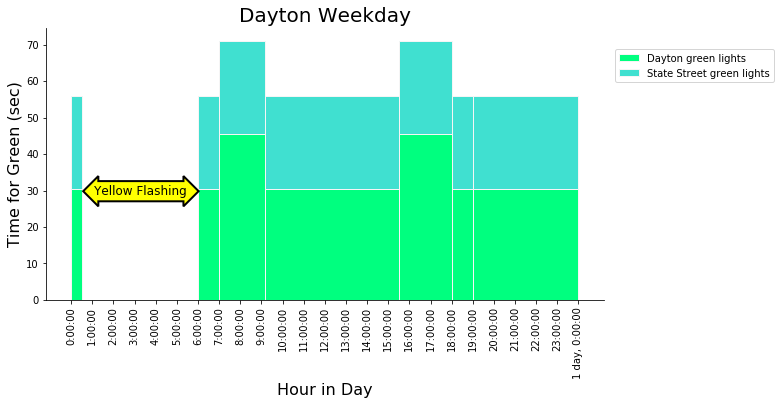

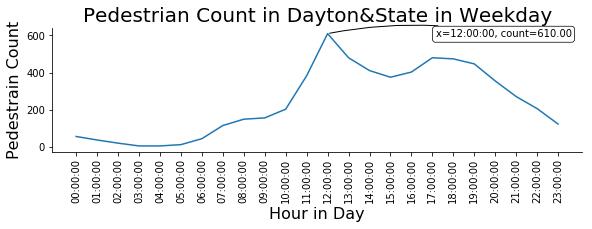

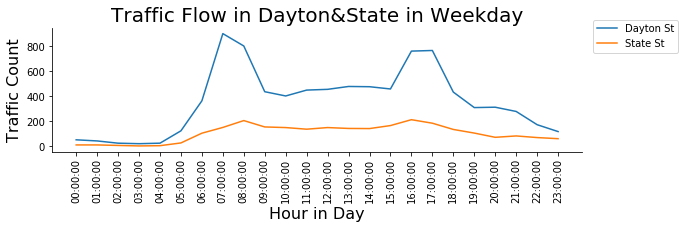

In [222]:
dayton_wkd_total, dayton_wkd_seconds, modify_Dayton_green_main_wkd, modify_Dayton_green_cross_wkd = \
    preprocess_ped_lights(ped_wkd, "SS_22_State_St__North_Side", "SS_23_State_St__South_Side", Dayton_weekday)
lights_ped_traffic(dayton_wkd_seconds, modify_Dayton_green_main_wkd, modify_Dayton_green_cross_wkd, "Dayton Weekday",
           dayton_wkd_total, "Pedestrian Count in Dayton&State in Weekday", 
           dayton_traffic['Sum'], state_traffic['Sum'], "Traffic Flow in Dayton&State in Weekday", 
          "Dayton green lights", "State Street green lights", 0.17, 0.4)

In year 2017-2018, the average daily traffic volume:

Dayton: 11100

State St: 1450

adjust the data set accordingly

In [236]:
dayton_traffic.head()

,Direction1,Direction2,Sum
00:00:00,12,40,52
01:00:00,14,29,43
02:00:00,3,22,25
03:00:00,5,16,21
04:00:00,3,22,25


In [287]:
dayton_traffic_scale = dayton_traffic/ dayton_traffic.Sum.sum() * 11100
dayton_traffic_scale.head()

,Direction1,Direction2,Sum
00:00:00,15.352697,51.175657,66.528354
01:00:00,17.911480,37.102351,55.013831
02:00:00,3.838174,28.146611,31.984786
03:00:00,6.396957,20.470263,26.867220
04:00:00,3.838174,28.146611,31.984786


In [238]:
state_traffic_scale = state_traffic/ state_traffic.Sum.sum() * 1450
state_traffic_scale.head()

,Direction1,Direction2,Sum
00:00:00,4.651163,1.744186,6.395349
01:00:00,5.232558,1.162791,6.395349
02:00:00,3.488372,0.581395,4.069767
03:00:00,1.744186,0.000000,1.744186
04:00:00,2.906977,0.000000,2.906977


In [239]:
dt_st_ratio = dayton_traffic_scale['Sum']/state_traffic_scale['Sum']
dt_st_ratio

00:00:00    10.402615
01:00:00     8.602163
02:00:00     7.859119
03:00:00    15.403873
04:00:00    11.002766
05:00:00    10.106245
06:00:00     7.628585
07:00:00    13.145027
08:00:00     8.577885
09:00:00     6.204140
10:00:00     5.912153
11:00:00     7.228095
12:00:00     6.689682
13:00:00     7.371084
14:00:00     7.391999
15:00:00     6.084662
16:00:00     7.872402
17:00:00     9.123375
18:00:00     7.074371
19:00:00     6.435580
20:00:00     9.566294
21:00:00     7.397040
22:00:00     5.438510
23:00:00     4.256808
Name: Sum, dtype: float64

In [242]:
tmp = pd.Series(np.full(24, 3/4), index=dt_st_ratio.index)
tmp

00:00:00    0.75
01:00:00    0.75
02:00:00    0.75
03:00:00    0.75
04:00:00    0.75
05:00:00    0.75
06:00:00    0.75
07:00:00    0.75
08:00:00    0.75
09:00:00    0.75
10:00:00    0.75
11:00:00    0.75
12:00:00    0.75
13:00:00    0.75
14:00:00    0.75
15:00:00    0.75
16:00:00    0.75
17:00:00    0.75
18:00:00    0.75
19:00:00    0.75
20:00:00    0.75
21:00:00    0.75
22:00:00    0.75
23:00:00    0.75
dtype: float64

In [244]:
dt_ratio = pd.concat([dt_st_ratio, tmp], axis=1)
dt_ratio.columns = ["traffic", "pedestrian"]
dt_ratio

,traffic,pedestrian
00:00:00,10.402615,0.75
01:00:00,8.602163,0.75
02:00:00,7.859119,0.75
03:00:00,15.403873,0.75
04:00:00,11.002766,0.75
05:00:00,10.106245,0.75
06:00:00,7.628585,0.75
07:00:00,13.145027,0.75
08:00:00,8.577885,0.75
09:00:00,6.204140,0.75


In [278]:
max(dt_ratio.traffic[6:])

13.145026700741026

In [280]:
min(dt_ratio.traffic[6:])

4.256807926898397

In [259]:
import matplotlib 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

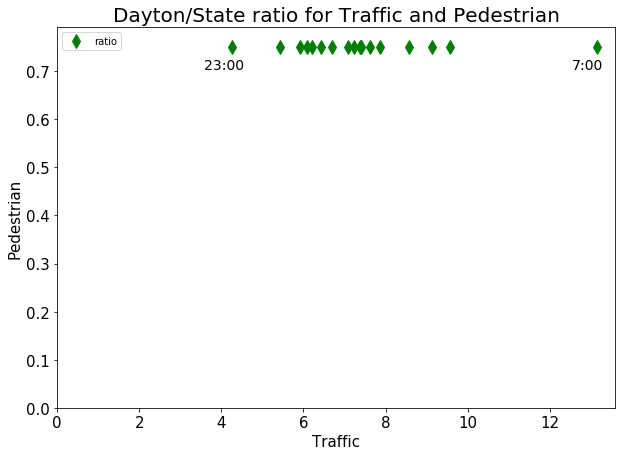

In [284]:
plt.figure(figsize=(10,7))
# plt.scatter(dt_ratio.index, dt_ratio.traffic, dt_ratio.pedestrian, c="g",\
#             alpha=0.5, marker='d', markersize=15, label="ratio")
plt.plot(dt_ratio.traffic[6:], dt_ratio.pedestrian[6:], 'd',
         color='green', markersize=10, linewidth=4, markeredgewidth=1, label="ratio")
plt.xlabel("Traffic", fontsize=15)
plt.ylabel("Pedestrian", fontsize=15)
plt.xlim(0)
plt.ylim(0)
plt.ylim(0)
plt.title("Dayton/State ratio for Traffic and Pedestrian", fontsize=20)
plt.text
plt.text(0.95, 0.9, '7:00', fontsize=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.3, 0.9, '23:00', fontsize=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.legend(loc='upper left')
plt.show()

Every car will pass the intersection in 2 seconds. 

In [291]:
dayton_traffic_scale = dayton_traffic_scale.applymap(round)
dayton_traffic_scale[6:]

,Direction1,Direction2,Sum
06:00:00,78,388,466
07:00:00,301,853,1154
08:00:00,270,757,1027
09:00:00,133,426,559
10:00:00,123,393,516
11:00:00,146,430,576
12:00:00,146,438,583
13:00:00,161,452,613
14:00:00,168,443,610
15:00:00,143,444,587


In [290]:
state_traffic_scale = state_traffic_scale.applymap(round)

In [293]:
dayton_traffic_scale['sec/car'] = 3600/dayton_traffic_scale['Sum']
dayton_traffic_scale['sec/car'][6:]

06:00:00     7.725322
07:00:00     3.119584
08:00:00     3.505355
09:00:00     6.440072
10:00:00     6.976744
11:00:00     6.250000
12:00:00     6.174957
13:00:00     5.872757
14:00:00     5.901639
15:00:00     6.132879
16:00:00     3.692308
17:00:00     3.669725
18:00:00     6.486486
19:00:00     9.068010
20:00:00     9.000000
21:00:00    10.084034
22:00:00    16.289593
23:00:00    23.841060
Name: sec/car, dtype: float64

In [294]:
state_traffic_scale['sec/car'] = 3600/state_traffic_scale['Sum']
state_traffic_scale['sec/car'][6:]

06:00:00     59.016393
07:00:00     40.909091
08:00:00     30.000000
09:00:00     40.000000
10:00:00     41.379310
11:00:00     45.000000
12:00:00     41.379310
13:00:00     43.373494
14:00:00     43.373494
15:00:00     37.113402
16:00:00     29.032258
17:00:00     33.333333
18:00:00     46.153846
19:00:00     58.064516
20:00:00     85.714286
21:00:00     75.000000
22:00:00     87.804878
23:00:00    102.857143
Name: sec/car, dtype: float64

In [368]:
def cost_dayton_wkd_tap(redTimeList):
    red_main, red_cross = np.split(redTimeList, 2)  # extract two variables from the whole list
    total_cycle = red_cross + red_main - 3
    ped_count = dayton_wait_wkd.Count[6:].reset_index(drop=True)  # calculate how many pedestrian at that time
    traffic_dayton = dayton_traffic_scale['Sum'][6:].reset_index(drop=True)
    traffic_state = state_traffic_scale['Sum'][6:].reset_index(drop=True)
    count_dayton = dayton_traffic_scale['sec/car'][6:].reset_index(drop=True)
    count_state = state_traffic_scale['sec/car'][6:].reset_index(drop=True)
    assert(len(red_main) == len(red_cross))  # should be equal to 24 if no yellow flashing
    leng = len(red_main)
    
    cost = 0
    for i in range(leng):
        # calculate pedestrian average wait time
        ped_wait_main_avg = red_main[i]**2/(2*total_cycle[i])/3600
        ped_wait_cross_avg = red_cross[i]**2/(2*total_cycle[i])/3600
        ped_wait_main = (ped_count[i]*3/5 * ped_wait_main_avg)
        ped_wait_cross = (ped_count[i]*4/5 * ped_wait_cross_avg)
        
        # calculate traffic average wait time
        count_main = math.ceil(red_main[i]/count_dayton[i])
        count_cross = math.ceil(red_cross[i]/count_state[i])
        tfc_wait_main = (red_main[i]*2 - (count_main-1) * count_dayton[i]) * count_main / 2 # Summation of arithmetic series
        tfc_wait_cross = (red_cross[i]*2 - (count_cross-1) * count_state[i]) * count_cross / 2
        
        # deal with the situation where car need to wait for more than one cycle
        # (red_main/cross[i] - 6) represent the green time in other direction (cross/main respectively)
        count_main_green = math.ceil((red_cross[i] - 6)/count_dayton[i])
        main_extra = 0
        if 2 * (count_main_green+count_main) > (red_cross[i] - 6):
            main_extra = 1000000
        
        count_cross_green = math.ceil((red_main[i] - 6)/count_state[i])
        cross_extra = 0
        if 2 * (count_cross_green+count_cross) > (red_main[i] - 6):
            cross_extra = 1000000
#         tfc_wait_main /= 3600
#         tfc_wait_cross /= 3600  # convert to hour
        
        cost += ped_wait_main**2/3000 + ped_wait_cross**2/3000  #  "/3000" is weight for pedestrian 
        cost += tfc_wait_main**2/100 + tfc_wait_cross**2/100  #  "/100" is weight for pedestrian 
        cost += main_extra + cross_extra
        
#         print(i,  ped_wait_main**2/3000, tfc_wait_main**2/100)
#         print(i,  ped_wait_cross**2/3000, tfc_wait_cross**2/100)
    
    return cost

In [369]:
# WT_dayton_wkd = np.concatenate((np.array(dayton_wait_wkd['Main Street Red (s)'])[6:], 
#                                 np.array(dayton_wait_wkd['Cross Street Red (s)'])[6:]))
cost_dayton_wkd_tap(WT_dayton_wkd)

1002755.566025414

In [370]:
res_dayton_wkd_tap = minimize(cost_dayton_wkd_tap, WT_dayton_wkd, method='SLSQP', 
               bounds=bnds_18, options={'xtol': 1e-8, 'disp': True})
res_dayton_wkd_tap.x

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1000821.2486515708
            Iterations: 41
            Function evaluations: 1667
            Gradient evaluations: 40


array([20.000445  , 20.        , 20.        , 20.00128179, 20.00835812,
       20.00029022, 20.04388422, 20.00073563, 20.00005036, 20.00951603,
       20.00167946, 20.        , 20.00120265, 21.80322792, 21.3158893 ,
       21.70252838, 25.68736013, 26.0489155 , 33.0192869 , 39.92023902,
       39.0200504 , 32.41022462, 30.18178349, 29.19597756, 26.93956652,
       28.02337129, 30.06143947, 34.53187397, 36.00029305, 34.00000185,
       28.60345019, 28.50978307, 30.2226746 , 31.54034908, 32.48621307,
       33.51231964])

In [373]:
cost_dayton_wkd_tap(res_dayton_wkd_tap.x)

1000821.2486515708

In [378]:
tmp_list = list(np.around(res_dayton_wkd_tap.x) )
tmp_list

[20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 22.0,
 21.0,
 22.0,
 26.0,
 26.0,
 33.0,
 40.0,
 39.0,
 32.0,
 30.0,
 29.0,
 27.0,
 28.0,
 30.0,
 35.0,
 36.0,
 34.0,
 29.0,
 29.0,
 30.0,
 32.0,
 32.0,
 34.0]

In [381]:
dayton_wkd_tap_main_red = tmp_list[:18]
dayton_wkd_tap_cross_red = tmp_list[18:]
for i in range(len(dayton_wkd_tap_main_red)):
    print("at ", (i+6), ", main red time is ", dayton_wkd_tap_main_red[i], ", cross red time is ", dayton_wkd_tap_cross_red[i])

at  6 , main red time is  20.0 , cross red time is  33.0
at  7 , main red time is  20.0 , cross red time is  40.0
at  8 , main red time is  20.0 , cross red time is  39.0
at  9 , main red time is  20.0 , cross red time is  32.0
at  10 , main red time is  20.0 , cross red time is  30.0
at  11 , main red time is  20.0 , cross red time is  29.0
at  12 , main red time is  20.0 , cross red time is  27.0
at  13 , main red time is  20.0 , cross red time is  28.0
at  14 , main red time is  20.0 , cross red time is  30.0
at  15 , main red time is  20.0 , cross red time is  35.0
at  16 , main red time is  20.0 , cross red time is  36.0
at  17 , main red time is  20.0 , cross red time is  34.0
at  18 , main red time is  20.0 , cross red time is  29.0
at  19 , main red time is  22.0 , cross red time is  29.0
at  20 , main red time is  21.0 , cross red time is  30.0
at  21 , main red time is  22.0 , cross red time is  32.0
at  22 , main red time is  26.0 , cross red time is  32.0
at  23 , main red 

collate date and export to excel

## Take both traffic and pedetrian into account

In [394]:
tap_programs = pd.read_excel('new_cycle2.xlsx', sheet_name='Programs')
tap_patterns = pd.read_excel('new_cycle2.xlsx', sheet_name='Patterns')

In [386]:
def fill_pat52(df, start, end):
    for it in range(start, end, 1):
        df['Total Cycle Time (s)'][it] = 52
        df['Main Street Total Cycle Time (s)'][it] = 33.5
        df['Main Street Red (s)'][it] = 20
        df['Main Street Green (s)'][it] = 29
        df['Cross Street Total Cycle Time (s)'][it] = 18.5
        df['Cross Street Red (s)'][it] = 35
        df['Cross Street Green (s)'][it] = 14
    return df

In [387]:
def fill_pat57(df, start, end):
    for it in range(start, end, 1):
        df['Total Cycle Time (s)'][it] = 57
        df['Main Street Total Cycle Time (s)'][it] = 38.5
        df['Main Street Red (s)'][it] = 20
        df['Main Street Green (s)'][it] = 34
        df['Cross Street Total Cycle Time (s)'][it] = 18.5
        df['Cross Street Red (s)'][it] = 40
        df['Cross Street Green (s)'][it] = 14
    return df

In [388]:
def fill_pat62(df, start, end):
    for it in range(start, end, 1):
        df['Total Cycle Time (s)'][it] = 62
        df['Main Street Total Cycle Time (s)'][it] = 43.5
        df['Main Street Red (s)'][it] = 20
        df['Main Street Green (s)'][it] = 39
        df['Cross Street Total Cycle Time (s)'][it] = 18.5
        df['Cross Street Red (s)'][it] = 45
        df['Cross Street Green (s)'][it] = 14
    return df

In [389]:
def fill_pat56(df, start, end):
    for it in range(start, end, 1):
        df['Total Cycle Time (s)'][it] = 56
        df['Main Street Total Cycle Time (s)'][it] = 31.5
        df['Main Street Red (s)'][it] = 26
        df['Main Street Green (s)'][it] = 27
        df['Cross Street Total Cycle Time (s)'][it] = 24.5
        df['Cross Street Red (s)'][it] = 33
        df['Cross Street Green (s)'][it] = 20
    return df

In [397]:
tap_programs['Pattern'] = tap_programs['Pattern'].replace('Flash', 0)
tap_programs['Pattern'].astype('int64')
tap_combined = pd.merge(tap_programs, tap_patterns, on=['Intersection', 'Pattern'], how="left")
Dayton_tap = tap_combined[tap_combined['Intersection'] == 'State and Dayton']

In [400]:
Dayton_wkd_tap = Dayton_tap[Dayton_tap['Day Type'] == 'Monday - Thursday']
Dayton_wkd_tap

,Intersection,Day Type,Start Time,Pattern,Main Street,Cross Street,Cycle Offset (s),Total Cycle Time (s),Main Street Total Cycle Time (s),Main Street Red (s),...,Main Street Do Not Walk (s),Main Street Flashing Do Not Walk (s),Main Street Walk (s),Cross Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Do Not Walk (s),Cross Street Flashing Do Not Walk (s),Cross Street Walk (s)
0,State and Dayton,Monday - Thursday,00:30:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State and Dayton,Monday - Thursday,06:00:00,57,Dayton/Fairchild,State,0.0,57.0,38.5,1.5,...,4.5,7.0,27.0,18.5,1.5,3.0,14.0,4.5,12.0,2.0
2,State and Dayton,Monday - Thursday,07:00:00,62,Dayton/Fairchild,State,0.0,62.0,43.5,1.5,...,4.5,7.0,32.0,18.5,1.5,3.0,14.0,4.5,12.0,2.0
3,State and Dayton,Monday - Thursday,09:00:00,52,Dayton/Fairchild,State,0.0,52.0,33.5,1.5,...,4.5,7.0,22.0,18.5,1.5,3.0,14.0,4.5,12.0,2.0
4,State and Dayton,Monday - Thursday,15:00:00,57,Dayton/Fairchild,State,0.0,57.0,38.5,1.5,...,4.5,7.0,27.0,18.5,1.5,3.0,14.0,4.5,12.0,2.0
5,State and Dayton,Monday - Thursday,18:00:00,52,Dayton/Fairchild,State,0.0,52.0,33.5,1.5,...,4.5,7.0,22.0,18.5,1.5,3.0,14.0,4.5,12.0,2.0
6,State and Dayton,Monday - Thursday,22:00:00,56,Dayton/Fairchild,State,0.0,56.0,31.5,1.5,...,4.5,7.0,20.0,24.5,1.5,3.0,20.0,4.5,12.0,8.0


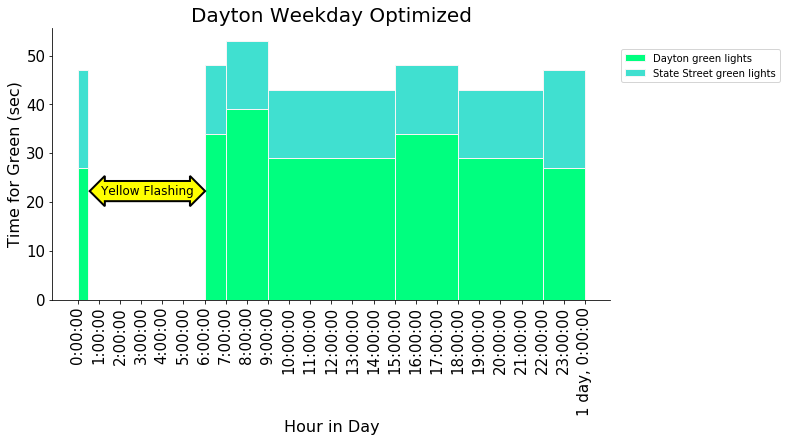

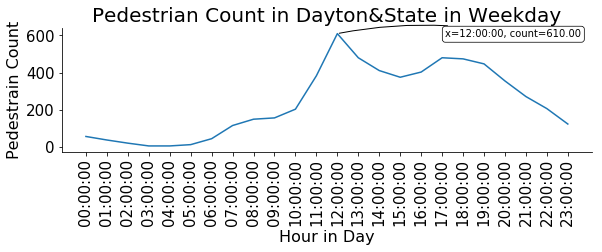

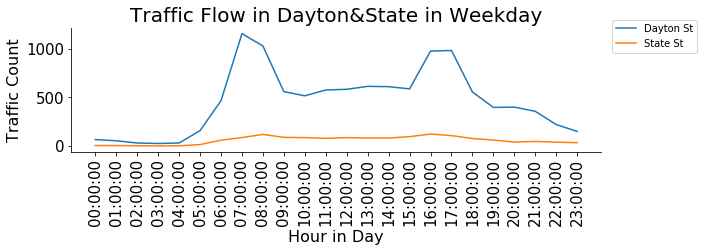

In [401]:
dayton_wkd_total, dayton_wkd_seconds, modify_Dayton_green_main_wkd, modify_Dayton_green_cross_wkd = \
    preprocess_ped_lights(ped_wkd, "SS_22_State_St__North_Side", "SS_23_State_St__South_Side", Dayton_wkd_tap)
lights_ped_traffic(dayton_wkd_seconds, modify_Dayton_green_main_wkd, modify_Dayton_green_cross_wkd, "Dayton Weekday Optimized",
           dayton_wkd_total, "Pedestrian Count in Dayton&State in Weekday", 
           dayton_traffic_scale['Sum'], state_traffic_scale['Sum'], "Traffic Flow in Dayton&State in Weekday", 
          "Dayton green lights", "State Street green lights", 0.17, 0.4)

In [ ]:
# TODO

In [ ]:
def pat_wait_process(df):
    df['ped_avg_wait_main'] = df['Main Street Red (s)']*df['Main Street Red (s)']\
    /(2*df['Total Cycle Time (s)'])
    df['ped_avg_wait_cross'] = df['Cross Street Red (s)']*df['Cross Street Red (s)']\
    /(2*df['Total Cycle Time (s)'])
    
    df['ped_total_wait_main'] = df['ped_avg_wait_main']*df.Count*3/5
    df['ped_total_wait_cross'] = df['ped_avg_wait_cross']*df.Count*4/5
    df = filNan(df)
    
    
    
    df['ped_total_wt_main_hour'] = df.total_wait_main/3600
    df['ped_total_wt_cross_hour'] = df.total_wait_cross/3600

    return df 

In [ ]:
tap_dayton_wait_wkd = dayton_wait_wkd.copy()

tap_dayton_wait_wkd = fill_pat57(tap_dayton_wait_wkd, 6, 7)
tap_dayton_wait_wkd = fill_pat62(tap_dayton_wait_wkd, 7, 9)
tap_dayton_wait_wkd = fill_pat52(tap_dayton_wait_wkd, 9, 15)
tap_dayton_wait_wkd = fill_pat57(tap_dayton_wait_wkd, 15, 18)
tap_dayton_wait_wkd = fill_pat52(tap_dayton_wait_wkd, 18, 22)
tap_dayton_wait_wkd = fill_pat56(tap_dayton_wait_wkd, 22, 24)
tap_dayton_wait_wkd = pat_wait_process(tap_dayton_wait_wkd)